# PRCP - 1027 - Skin Disorder Classification

## Problem Statement 

**Task 1:** Prepare a complete data analysis report on the given data.

**Task 2:** Create a predictive model  using machine learning techniques to predict the various classes of skin disease. 

**Task3:** Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 


## Dataset Information
This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.

The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. 

The diseases in this group are **psoriasis(1)**, **seboreic dermatitis(2)**, **lichen planus(3)**, **pityriasis rosea(4)**, **cronic dermatitis(5)**, and **pityriasis rubra pilaris(6)**. 

(**_Histopathology_**:The study of diseased cells and tissues using a microscope.)

Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. 

Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. **Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.**

The values of the histopathological features are determined by an analysis of the samples under a microscope.

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. 

The age feature simply represents the age of the patient. 

Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

The names and id numbers of the patients were recently removed from the database.

## Importing Required Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# for warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px

from matplotlib import rcParams

## Reading the File

In [2]:
df=pd.read_csv("dataset_dermatology.csv")

## Basic Checks

In [3]:
pd.set_option("display.max_columns", None)
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [4]:
df.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35,1


In [5]:
print(df.shape)
df.info()

(366, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                          

In [6]:
#Unique Values in Each Columns
print(df.apply(lambda col: col.unique()))

erythema                                                                         [2, 3, 1, 0]
scaling                                                                          [2, 3, 1, 0]
definite_borders                                                                 [0, 3, 2, 1]
itching                                                                          [3, 2, 0, 1]
koebner_phenomenon                                                               [0, 1, 2, 3]
polygonal_papules                                                                [0, 3, 2, 1]
follicular_papules                                                               [0, 3, 1, 2]
oral_mucosal_involvement                                                         [0, 3, 2, 1]
knee_and_elbow_involvement                                                       [1, 0, 3, 2]
scalp_involvement                                                                [0, 1, 2, 3]
family_history                                              

## Attribute Information: 

### Clinical Attributes:
1. **Erythema** - A skin reaction that can be triggered by an infection or some medicines.
2. **Scaling** - The loss of the outer layer of the epidermis in large, scale-like flakes
3. **Definite Borders** - Border description of skin lesions, i.e, areas of  skin that are different from the skin around them.
4. **itching** - Of, relating to, or characterized by an irritating sensation of the skin.
5. **Koebner Phenomenon** -  Also called the Koebner response or the isomorphic response,  is the appearance of skin lesions on lines of trauma.(Source - Wikipedia)
6. **Polygonal Papules** - A papule is a small, well-defined bump in the skin. It may have a rounded, pointed or flat top.
7. **Follicular Papules** - Individual papules that include a central hair follicle. (Source -USA National Centre of Biotechnology Information)

8. **Oral mucosal involvement** -Oral involvement generally consists of mucosal ulceration associated with lesions of the underlying bone. (Source -USA National Centre of Biotechnology Information)

9. **Knee and elbow involvement** - Skin complexities on knee and elbow
10. **Scalp involvement** - Skin complexities on scalp
11. **Family history, (0 or 1)** - If any of these diseases has been observed in the family.
12. **Age**

### Histopathological Attributes:

1. **Melanin_incontinence** - Pigmentary incontinence, which is a phenomenon observed in some inflammatory skin disorders. Clinically it may be seen as a slate-colored pigmentation. Histologically it is seen as an accumulation of melanin in the upper dermis (Source -USA National Centre of Biotechnology Information).
2. **Eosinophils in the infiltrate** - Eosinophils are a kind of white blood cell that helps fight disease. Eosinophil infiltration is a common finding in a broad spectrum of skin diseases, despite the fact that the skin is devoid of eosinophils under physiologic conditions.(Source -USA National Centre of Biotechnology Information).
3. **PNL infiltrate** - Pure Neuritic Leprosy(PNL) Infiltrate.
4. **Fibrosis of the papillary dermis** - Overgrowth, hardening, and/or scarring of various tissues and  excess deposition of extracellular matrix components including collagen in the thin top layer of the dermis (the inner layer of the skin), i.e, papillary dermis.(Source -USA National Centre of Biotechnology Information).
5. **Exocytosis** -  Exocytosis is infiltration of the epidermis by inflammatory or circulating blood cells. Pathological changes may arise in epidermis, dermis and/or subcutaneous tissue (tissues under the skin).
6. **Acanthosis** - A skin condition that causes a dark discoloration in body folds and creases. It typically affects the armpits, groin and neck. 
7. **Hyperkeratosis** - The increased thickness of the stratum corneum, the outer layer of the skin. Stratum corneum is composed of multiple layers of keratinocyte bodies that, during maturation, produced keratin and subsequently have lost their nucleus and cytoplasmic organelles.
8. **Parakeratosis** - Incomplete maturation of epidermal keratinocytes, resulting in abnormal retention of nuclei in the stratum corneum. It occurs in many diseases of the skin, particularly in psoriasis.
9. **Clubbing of the rete ridges** - Rete ridges are the epithelial extensions that project into the underlying connective tissue in both skin and mucous membranes.
10. **Elongation of the rete ridges** - Mechanical stretching stimulates growth of the basal layer and rete ridges in the epidermis.
11. **Thinning_of_the_suprapapillary_epidermis** -  A thinning of the granular layer at the tips of the papillae.
12. **Spongiform_pustule** - Pustular psoriasis which is microscopically manifested as characteristic spongiform pustule.
13. **Munro_microabcess** - One of the characteristic histological features of early psoriasis vulgaris
14. **Focal_hypergranulosis** An increased thickness of the stratum granulosum.
15. **Disappearance_of_the_granular_layer** - Degeneration of granular layer in Cerebellum.
16. **Vacuolisation_and_damage_of_basal_layer** - presence of vacuolisation and damage of skin basal layer.
17. **Spongiosis** - presence of intercellular edema
18. **Saw-tooth_appearance_of_retes** - appearance of saw tooth patterns under the skin tissue.
19. **Follicular_horn_plug** - presence of follicular horn plugs
20. **Perifollicular_parakeratosis** -  keratinization characterized by the retention of nuclei in tissues surrounding skin follicles.
21. **Inflammatory_monoluclear_inflitrate** - increase in the number of infiltrating mononuclear cells in the skin.
22. **Band-like_infiltrate** - basal epidermis in a banded pattern.

### Class of Diseases
The diseases in this group are

1. **Psoriasis(1)**,
2. **Seboreic Dermatitis(2)**,
3. **Lichen Planus(3)**,
4. **Pityriasis Rosea(4)**,
5. **Cronic Dermatitis(5)**,
6. **Pityriasis Rubra Pilaris(6)**.

In [7]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [8]:
df.describe(include='O')

,Age
count,366
unique,61
top,40
freq,17


## Data Manilupation and Cleaning

In [9]:
for column in df.columns:
    df[column]=pd.to_numeric(df[column], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [11]:
df['family_history'].replace([0,1], ["Not Observed", "Observed"], inplace=True)

In [12]:
df['class'].replace([1,2,3,4,5,6],['Psoriasis', 'Seboreic_Dermatitis', 'Lichen_Planus', 'Pityriasis_Rosea','Cronic_Dermatitis','Pityriasis_rubra_pilaris'], inplace=True)

In [13]:
df['Age'].unique()

array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 10.,
       65., 38., 23., 17., 51., 42., 44., 33., 43., 50., 34., nan, 15.,
       46., 62., 35., 48., 12., 52., 60., 32., 19., 29., 25., 36., 13.,
       27., 31., 28., 64., 39., 47., 16.,  0.,  7., 70., 37., 61., 67.,
       56., 53., 24., 58., 49., 63., 68.,  9., 75.])

In [14]:
# Replace using median 
median = df['Age'].median()
df['Age'].fillna(median, inplace=True)
df['Age'] = df['Age'].replace(0,df['Age'].median())

In [15]:
df['Age'].unique()

array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 10.,
       65., 38., 23., 17., 51., 42., 44., 33., 43., 50., 34., 35., 15.,
       46., 62., 48., 12., 52., 60., 32., 19., 29., 25., 36., 13., 27.,
       31., 28., 64., 39., 47., 16.,  7., 70., 37., 61., 67., 56., 53.,
       24., 58., 49., 63., 68.,  9., 75.])

In [16]:
df_eda = df.copy()

In [17]:
df_eda.drop(columns=['Age'])

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
0,2,2,0,3,0,0,0,0,1,0,Not Observed,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,Seboreic_Dermatitis
1,3,3,3,2,1,0,0,0,1,1,Observed,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,Psoriasis
2,2,1,2,3,1,3,0,3,0,0,Not Observed,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,Lichen_Planus
3,2,2,2,0,0,0,0,0,3,2,Not Observed,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,Psoriasis
4,2,3,2,2,2,2,0,2,0,0,Not Observed,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,Lichen_Planus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,Not Observed,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,Pityriasis_Rosea
362,3,2,1,0,1,0,0,0,0,0,Not Observed,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,Pityriasis_Rosea
363,3,2,2,2,3,2,0,2,0,0,Not Observed,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,Lichen_Planus
364,2,1,3,1,2,3,0,2,0,0,Not Observed,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,Lichen_Planus


In [18]:
for col in df_eda.drop(columns=['Age']).columns:
    df_eda[col] = df_eda[col].astype('category',copy=False)

In [19]:
df_eda.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,Not Observed,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,Seboreic_Dermatitis
1,3,3,3,2,1,0,0,0,1,1,Observed,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,Psoriasis
2,2,1,2,3,1,3,0,3,0,0,Not Observed,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,Lichen_Planus
3,2,2,2,0,0,0,0,0,3,2,Not Observed,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,Psoriasis
4,2,3,2,2,2,2,0,2,0,0,Not Observed,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,Lichen_Planus


In [20]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   erythema                                  366 non-null    category
 1   scaling                                   366 non-null    category
 2   definite_borders                          366 non-null    category
 3   itching                                   366 non-null    category
 4   koebner_phenomenon                        366 non-null    category
 5   polygonal_papules                         366 non-null    category
 6   follicular_papules                        366 non-null    category
 7   oral_mucosal_involvement                  366 non-null    category
 8   knee_and_elbow_involvement                366 non-null    category
 9   scalp_involvement                         366 non-null    category
 10  family_history            

# Exploratory Data Analysis

As per the information provided, Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. 

- **Clinical Features:** Erythema, Scaling, Definite_borders, Itching, Koebner_phenomenon, Polygonal_papules, Follicular_papules, Oral_mucosal_involvement, Knee_and_elbow_involvement, Scalp_involvement, Family_history, and Age. 

- **Histopathological features:** Melanin_incontinence, Eosinophils_in_the_infiltrate, PNL_infiltrate, Fibrosis_of_the_papillary_dermis, Exocytosis, Acanthosis, Hyperkeratosis, Parakeratosis, Clubbing_of_the_rete_ridges, Elongation_of_the_rete_ridges, Thinning_of_the_suprapapillary_epidermis, Spongiform_pustule, Munro_microabcess, Focal_hypergranulosis, Disappearance_of_the_granular_layer, Vacuolisation_and_damage_of_basal_layer, Spongiosis, Saw-tooth_appearance_of_retes, Follicular_horn_plug, Perifollicular_parakeratosis, Inflammatory_monoluclear_inflitrate, Band-like_infiltrate.

## Count and Distribution of Clinical Features

In [21]:
clinical_features=['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history']

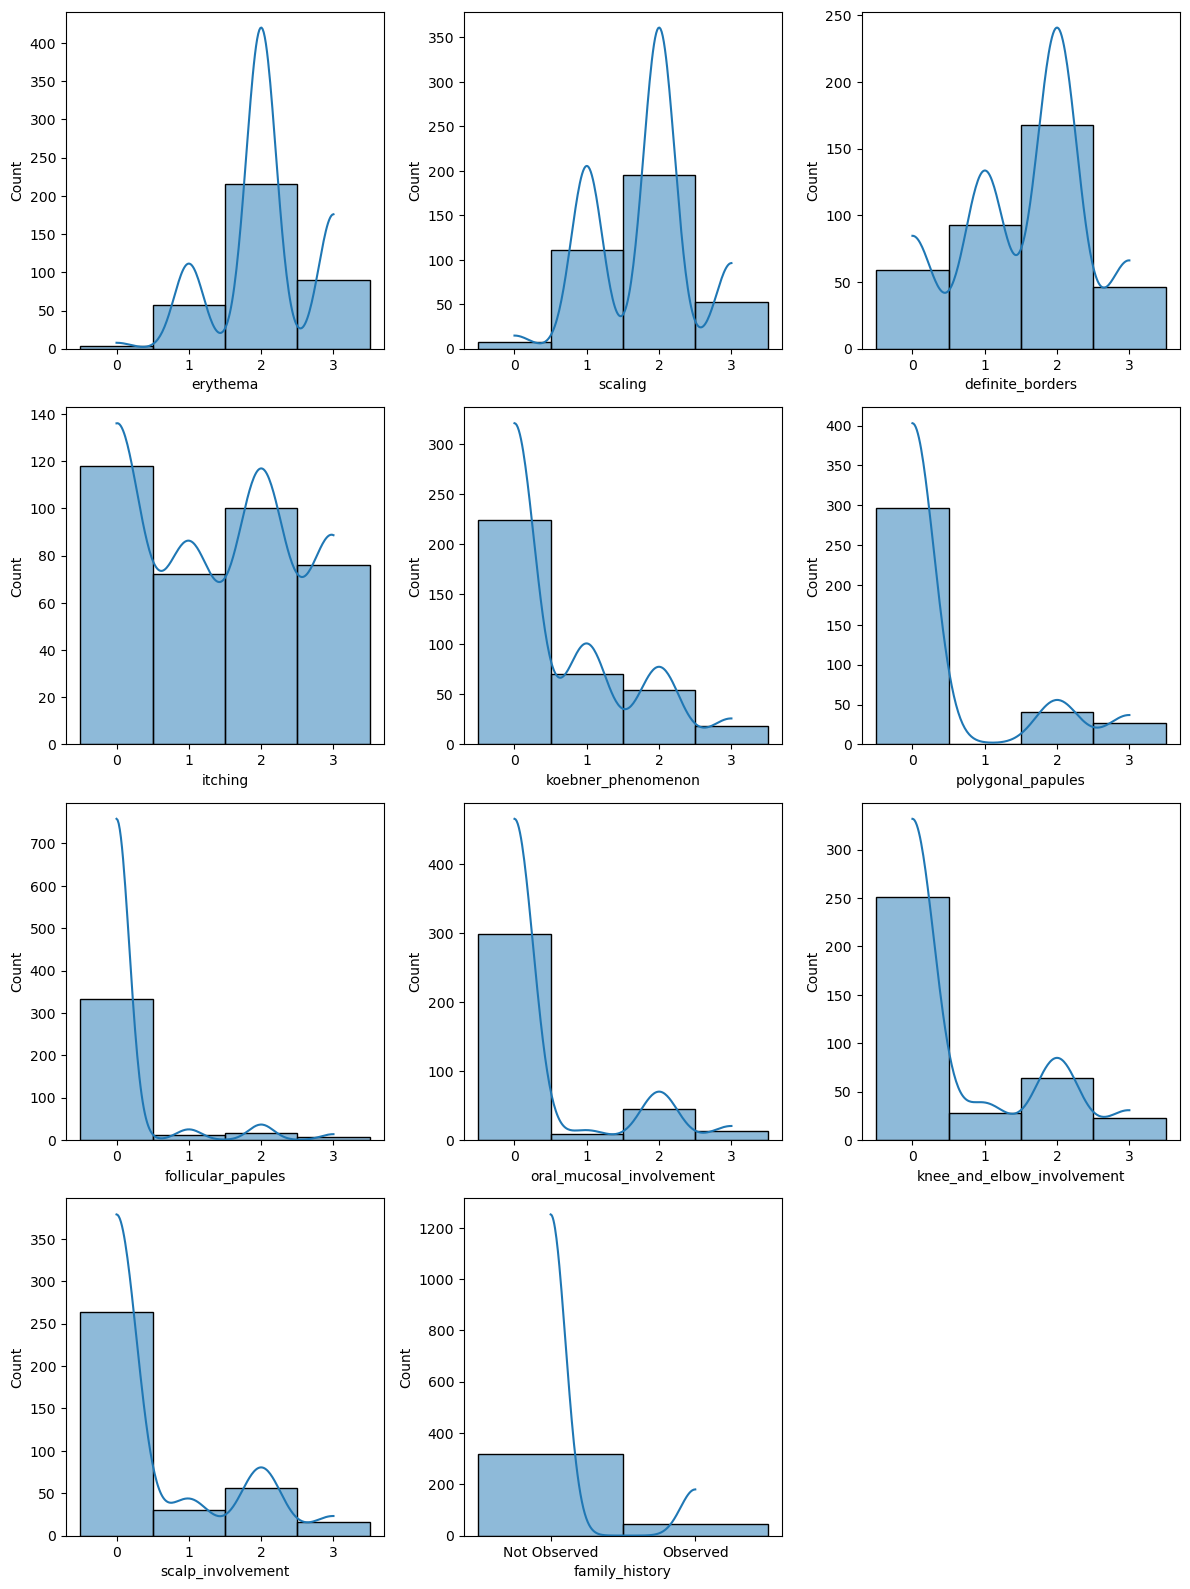

In [22]:
fig=plt.figure(figsize=(12,16))
for i, col in enumerate(clinical_features):
    ax=fig.add_subplot(4,3, i+1)
    sns.histplot(x=df_eda[col], ax=ax, kde=True)
plt.tight_layout()    
plt.show()

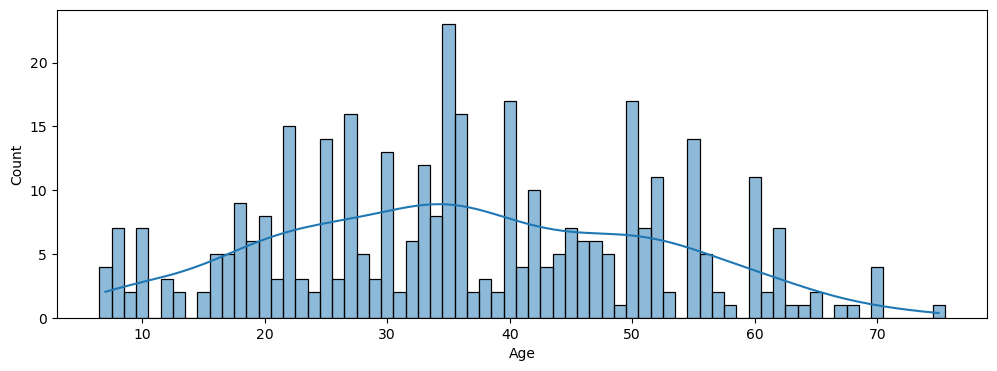

In [23]:
plt.figure(figsize=(12,4))
sns.histplot(x=df_eda['Age'],kde=True, discrete=True)
plt.show()

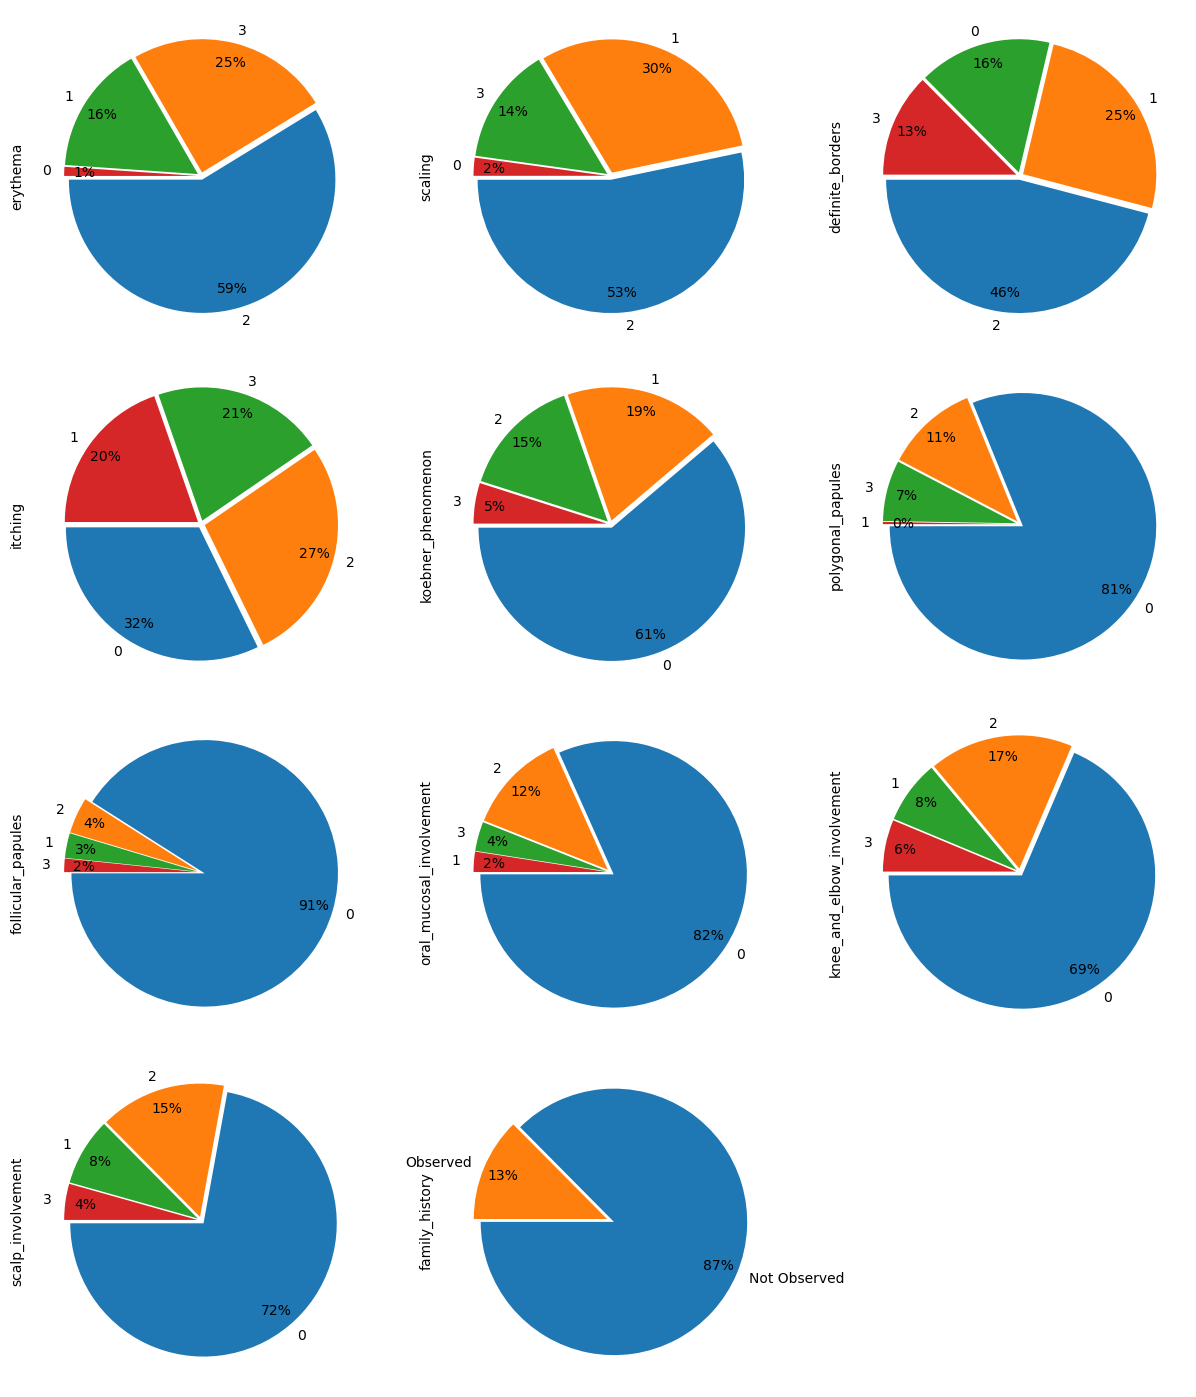

In [24]:
fig=plt.figure(figsize=(12,28))
for i, col in enumerate(clinical_features):
    ax=fig.add_subplot(8,3, i+1)
    explode = [0.028]
    tempList = list(explode)
    count = len(df[col].unique())-1
    for i in range(count):
        explode.extend(tempList)
    df[col].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=180, radius=1.0, pctdistance=0.85, explode=explode)
    plt.tight_layout()    
plt.show()

## Count and Distribution of Histopathological Features

In [25]:
histopath_features = ['melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']

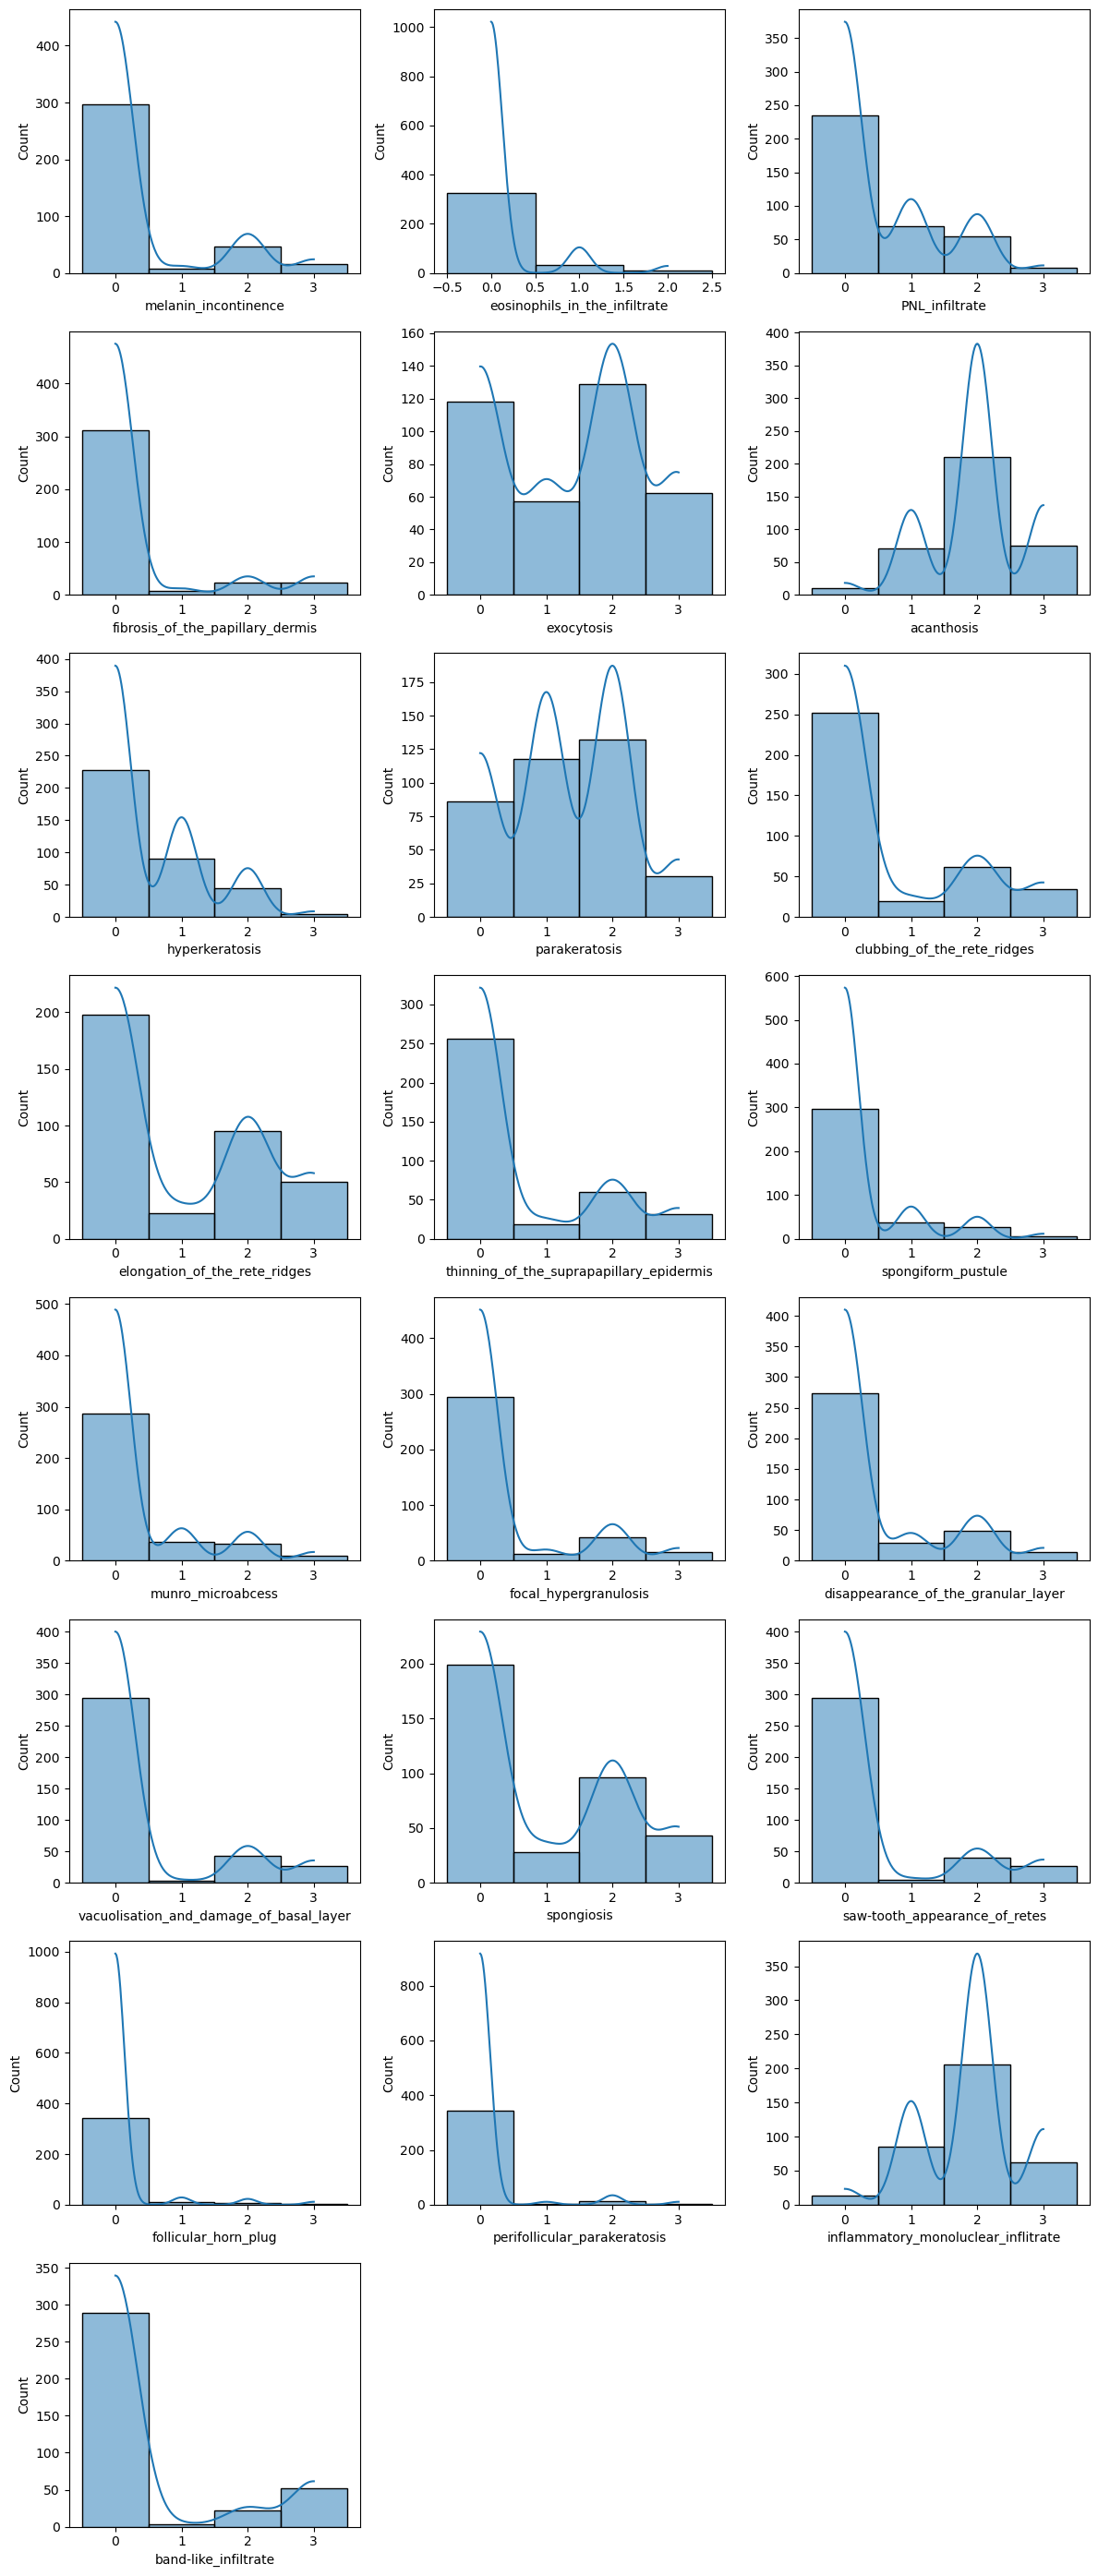

In [26]:
fig=plt.figure(figsize=(12,28))
for i, col in enumerate(histopath_features):
    ax=fig.add_subplot(8,3, i+1)
    sns.histplot(x=df_eda[col], ax=ax, kde=True)
plt.tight_layout()    
plt.show()

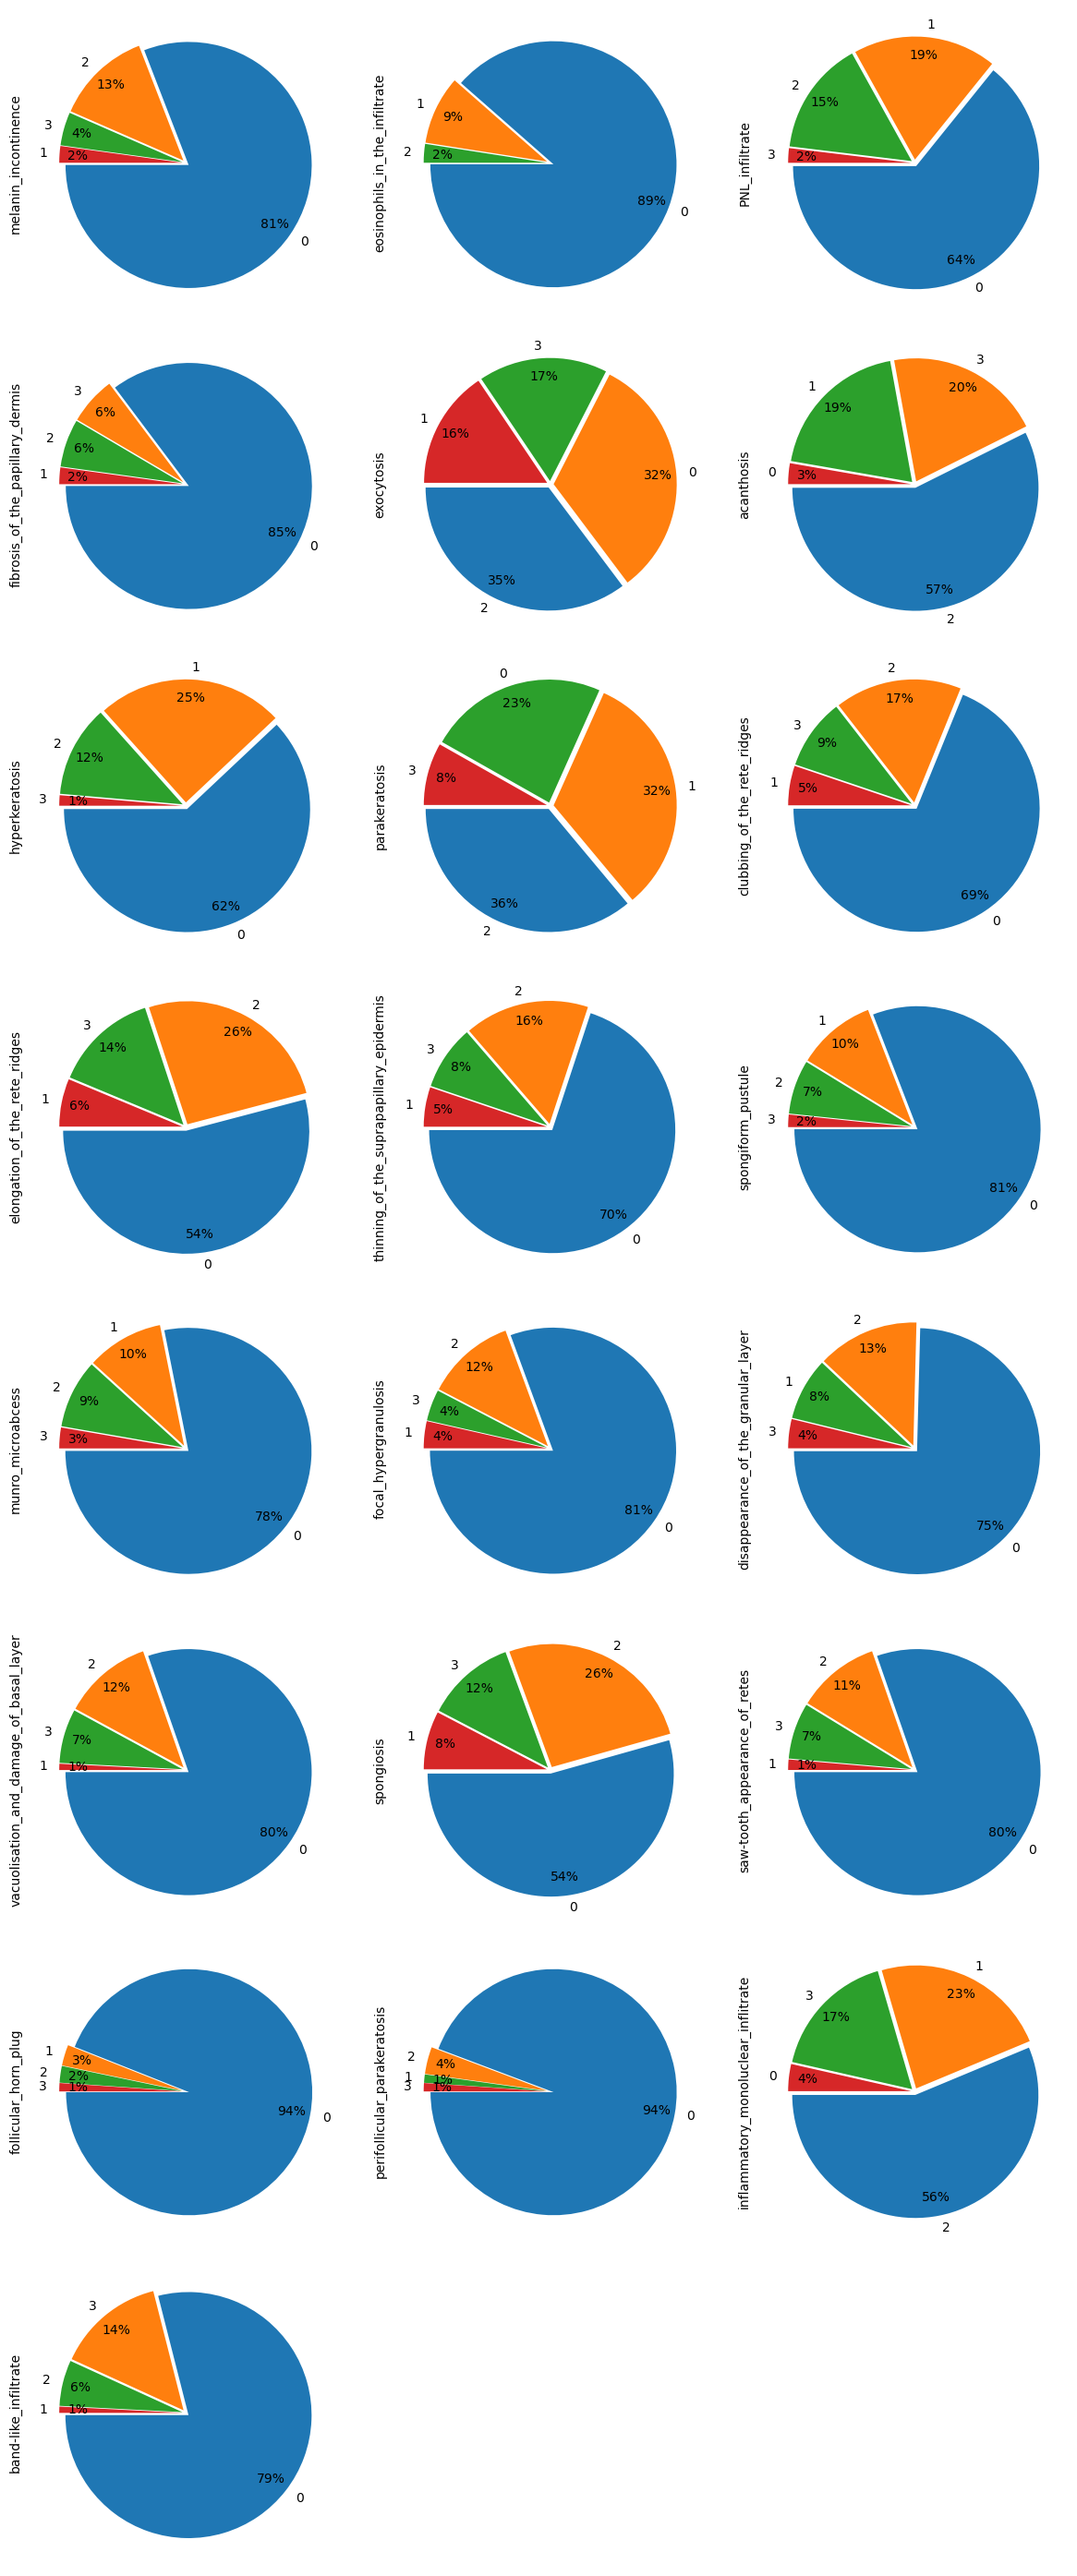

In [27]:
fig=plt.figure(figsize=(12,28))
for i, col in enumerate(histopath_features):
    ax=fig.add_subplot(8,3, i+1)
    explode = [0.028]
    tempList = list(explode)
    count = len(df[col].unique())-1
    for i in range(count):
        explode.extend(tempList)
    df[col].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=180, radius=1.0, pctdistance=0.85, explode=explode)
    plt.tight_layout()    
plt.show()

## Distribution and Count of Classes of Skin Disorders

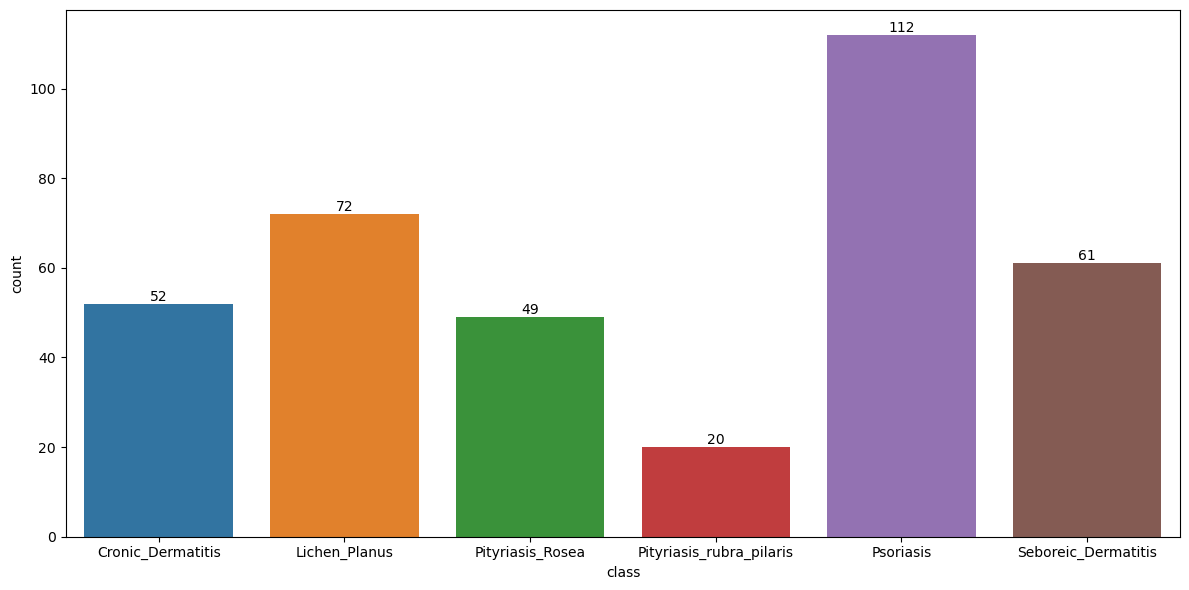

In [28]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=df_eda['class'])
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()

<AxesSubplot:ylabel='class'>

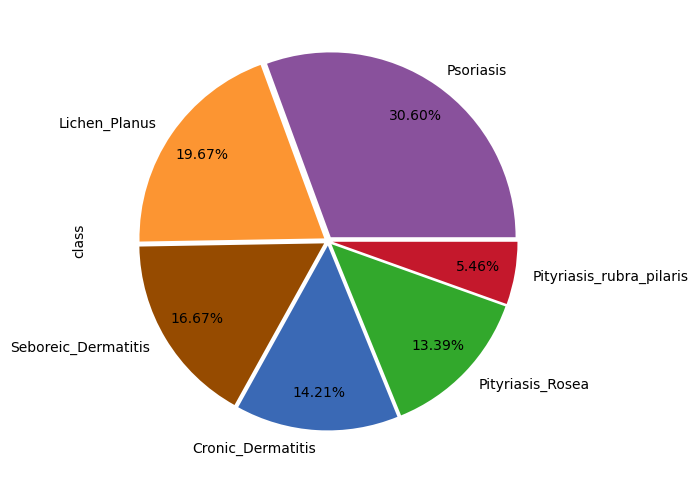

In [29]:
plt.figure(figsize=(16,6))
df_eda['class'].value_counts().plot(kind='pie', autopct='%0.02f%%', radius=1.0, pctdistance=0.8, colors= ['#89519c','#FC9532','#964B00','#3a69b5', '#32a82c','#c4182c'] ,explode = [0.025, 0.025, 0.025, 0.025, 0.025, 0.025])

In [30]:
df_eda['class'].value_counts()

Psoriasis                   112
Lichen_Planus                72
Seboreic_Dermatitis          61
Cronic_Dermatitis            52
Pityriasis_Rosea             49
Pityriasis_rubra_pilaris     20
Name: class, dtype: int64

## Age wise Distribution of classes of Skin diseases.

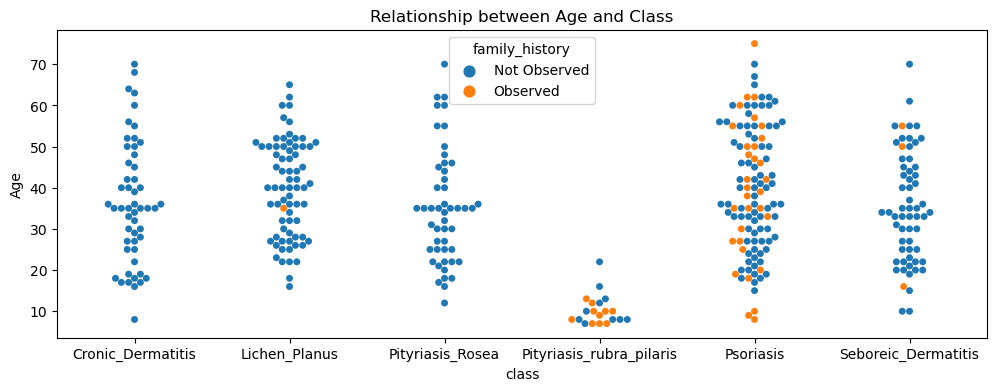

In [31]:
plt.figure(figsize=(12,4))
sns.swarmplot(y="Age", x="class", data=df_eda, hue='family_history')
plt.title('Relationship between Age and Class')
plt.show()

# Data Preprocessing
**This is a classification problems having multiple classes with imbalanced dataset.**

## Checking For Missing Values

In [32]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

**There are no missing values in data**

## Checking Unique Values

In [33]:
# Checking for Unique labels in each feature.
print("UNIQUE VALUES IN EACH FEATURE: ")
print("==============================")
for col in df.columns:
    print(col ,":", df[col].unique(), "with", len(df[col].unique()), "labels")
    print("--------------------------------------------------------------------------------")

UNIQUE VALUES IN EACH FEATURE: 
erythema : [2 3 1 0] with 4 labels
--------------------------------------------------------------------------------
scaling : [2 3 1 0] with 4 labels
--------------------------------------------------------------------------------
definite_borders : [0 3 2 1] with 4 labels
--------------------------------------------------------------------------------
itching : [3 2 0 1] with 4 labels
--------------------------------------------------------------------------------
koebner_phenomenon : [0 1 2 3] with 4 labels
--------------------------------------------------------------------------------
polygonal_papules : [0 3 2 1] with 4 labels
--------------------------------------------------------------------------------
follicular_papules : [0 3 1 2] with 4 labels
--------------------------------------------------------------------------------
oral_mucosal_involvement : [0 3 2 1] with 4 labels
----------------------------------------------------------------------

**There are no unusual values in features**

## One Hot Encoding Family_History

In [34]:
df= pd.get_dummies(df, columns=['family_history'])

In [35]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class', 'family_history_Not Observed',
       'family_history_Observed'],
      dtype='obje

## Declare Feature Vector and Target Variable

In [36]:
X=df.drop(columns=["class"])
y=df['class']

In [37]:
X.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,family_history_Not Observed,family_history_Observed
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,1,0
1,3,3,3,2,1,0,0,0,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,0,1
2,2,1,2,3,1,3,0,3,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,1,0
3,2,2,2,0,0,0,0,0,3,2,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1,0
4,2,3,2,2,2,2,0,2,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,1,0


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  melanin_incontinence                  

In [39]:
y.head()

0    Seboreic_Dermatitis
1              Psoriasis
2          Lichen_Planus
3              Psoriasis
4          Lichen_Planus
Name: class, dtype: object

## Feature Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [41]:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [42]:
X

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,family_history_Not Observed,family_history_Observed
0,0.666667,0.666667,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.333333,0.0,0.705882,1.0,0.0
1,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,0.0,0.000000,0.333333,0.333333,0.000000,0.0,0.333333,0.0,0.333333,0.666667,0.0,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.014706,0.0,1.0
2,0.666667,0.333333,0.666667,1.000000,0.333333,1.000000,0.0,1.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.0,0.333333,0.666667,0.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.666667,1.000000,0.666667,0.0,0.0,0.666667,1.0,0.279412,1.0,0.0
3,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.666667,0.000000,0.0,1.000000,0.0,0.000000,0.666667,0.0,1.000000,0.666667,0.666667,0.666667,0.666667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.485294,1.0,0.0
4,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.0,0.666667,0.000000,0.000000,0.333333,0.0,0.000000,0.0,0.333333,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.666667,1.000000,0.666667,1.000000,0.0,0.0,0.666667,1.0,0.558824,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.666667,0.333333,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0,0.333333,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.666667,0.0,0.264706,1.0,0.0
362,1.000000,0.666667,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.666667,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.666667,0.0,0.426471,1.0,0.0
363,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.0,0.666667,0.000000,0.000000,0.666667,1.0,0.000000,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.666667,1.0,0.308824,1.0,0.0
364,0.666667,0.333333,1.000000,0.333333,0.666667,1.000000,0.0,0.666667,0.000000,0.000000,0.666667,0.0,0.000000,0.0,1.000000,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.0,0.666667,1.0,0.632353,1.0,0.0


## Balancing the Classes of Target Variables

In [43]:
y.value_counts()

Psoriasis                   112
Lichen_Planus                72
Seboreic_Dermatitis          61
Cronic_Dermatitis            52
Pityriasis_Rosea             49
Pityriasis_rubra_pilaris     20
Name: class, dtype: int64

In [44]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X, y = smt.fit_resample(X, y)

In [45]:
y.value_counts()

Seboreic_Dermatitis         112
Psoriasis                   112
Lichen_Planus               112
Cronic_Dermatitis           112
Pityriasis_Rosea            112
Pityriasis_rubra_pilaris    112
Name: class, dtype: int64

In [46]:
X.shape, y.shape

((672, 35), (672,))

## Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [48]:
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of Y_train is:", y_train.shape)
print("The shape of Y_test is:", y_test.shape)

The shape of X_train is: (470, 35)
The shape of X_test is: (202, 35)
The shape of Y_train is: (470,)
The shape of Y_test is: (202,)


In [49]:
# MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [50]:
# MODEL EVALUATION
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [51]:
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of Y_train is:", y_train.shape)
print("The shape of Y_test is:", y_test.shape)

The shape of X_train is: (470, 35)
The shape of X_test is: (202, 35)
The shape of Y_train is: (470,)
The shape of Y_test is: (202,)


## 1. Logistic Regression Model 

In [52]:
Log_Reg = LogisticRegression(C=1, multi_class='ovr',max_iter=100).fit(X_train, y_train)

In [53]:
print("Logistic Regression coefficients shape: ", Log_Reg.coef_.shape)
print("Logistic Regression intercept shape: ", Log_Reg.intercept_.shape)

Logistic Regression coefficients shape:  (6, 35)
Logistic Regression intercept shape:  (6,)


In [54]:
y_train_pred_Log_Reg = Log_Reg.predict(X_train) # training model 
y_test_pred_Log_Reg = Log_Reg.predict(X_test) # testing model 

In [55]:
#Evaluate Logistic Regression model:
print("Logistic Regression training set score: %f" % accuracy_score(y_train, y_train_pred_Log_Reg))
print("Logistic Regression test set score: %f" % accuracy_score(y_test, y_test_pred_Log_Reg))

Logistic Regression training set score: 0.989362
Logistic Regression test set score: 0.975248


In [56]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_Log_Reg, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        26
     seboreic_dermatitis       1.00      1.00      1.00        34
           lichen_planus       0.91      0.94      0.93        34
        pityriasis_rosea       1.00      1.00      1.00        33
       cronic_dermatitis       1.00      1.00      1.00        39
pityriasis_rubra_pilaris       0.94      0.92      0.93        36

                accuracy                           0.98       202
               macro avg       0.98      0.98      0.98       202
            weighted avg       0.98      0.98      0.98       202



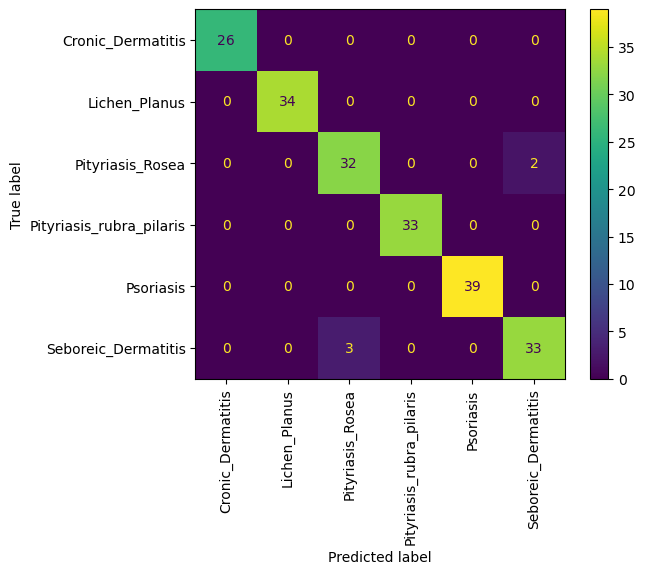

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_Log_Reg, xticks_rotation='vertical')

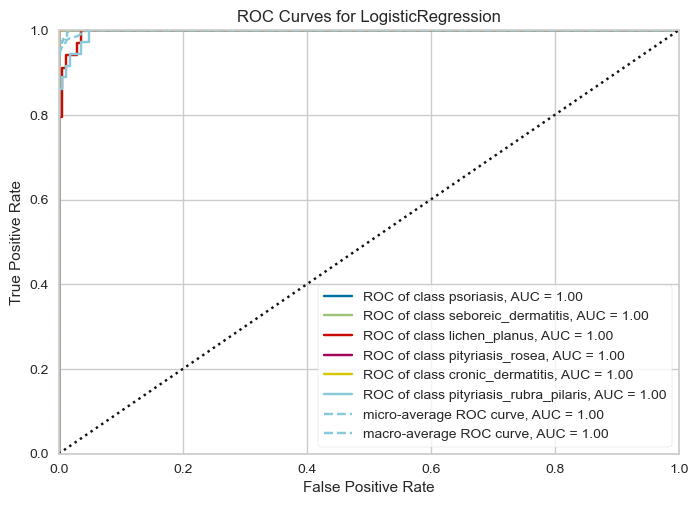

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [211]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(Log_Reg, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

In [58]:
Log_Reg.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
params_Log_Reg = {'penalty' : ['l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
                 }
from sklearn.model_selection import ParameterGrid
param_size_Log_Reg = ParameterGrid(params_Log_Reg)
len(param_size_Log_Reg)  

1200

In [60]:
Log_Reg_Tuned = LogisticRegression(C = 0.0001, max_iter = 100, penalty='none', solver='sag')
Log_Reg_Tuned.fit(X_train, y_train)

LogisticRegression(C=0.0001, penalty='none', solver='sag')

In [61]:
y_train_pred_Log_Reg_Tuned = Log_Reg_Tuned.predict(X_train) # training model 
y_test_pred_Log_Reg_Tuned = Log_Reg_Tuned.predict(X_test) # testing model 

In [62]:
#Evaluate Logistic Regression model:
print("Logistic Regression training set score: %f" % accuracy_score(y_train, y_train_pred_Log_Reg_Tuned))
print("Logistic Regression test set score: %f" % accuracy_score(y_test, y_test_pred_Log_Reg_Tuned))

Logistic Regression training set score: 1.000000
Logistic Regression test set score: 0.985149


In [63]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_Log_Reg_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        26
     seboreic_dermatitis       1.00      1.00      1.00        34
           lichen_planus       0.94      0.97      0.96        34
        pityriasis_rosea       1.00      1.00      1.00        33
       cronic_dermatitis       1.00      1.00      1.00        39
pityriasis_rubra_pilaris       0.97      0.94      0.96        36

                accuracy                           0.99       202
               macro avg       0.99      0.99      0.99       202
            weighted avg       0.99      0.99      0.99       202



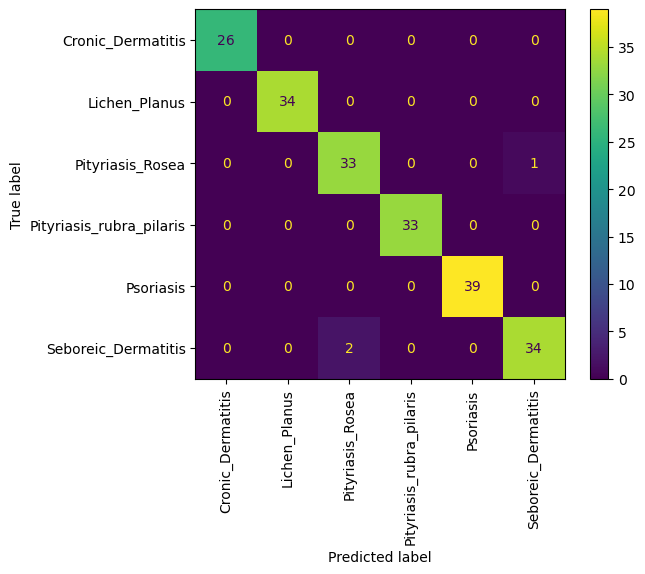

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_Log_Reg_Tuned, xticks_rotation='vertical')

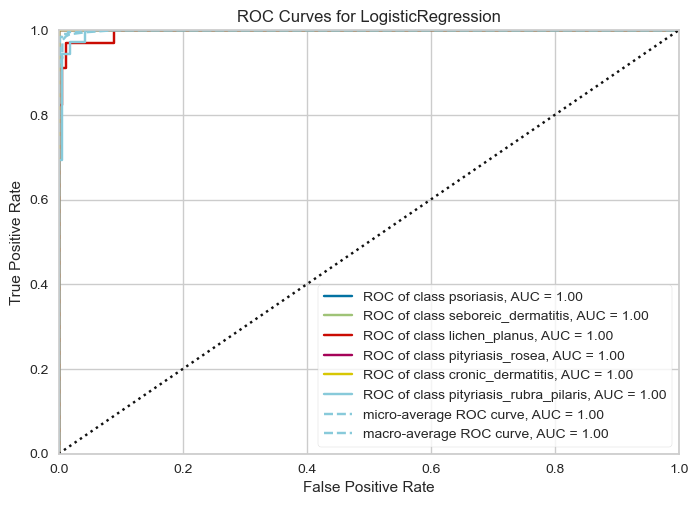

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [181]:
visualizer = ROCAUC(Log_Reg_Tuned, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

## 2. K-Neighbors Classifier

In [65]:
KNN_C = KNeighborsClassifier()
KNN_C.fit(X_train,y_train)

KNeighborsClassifier()

In [66]:
y_train_pred_KNN_C = KNN_C.predict(X_train)
y_test_pred_KNN_C = KNN_C.predict(X_test)

In [67]:
#Evaluate KNN model:
print("KNN training set score: %f" % accuracy_score(y_train, y_train_pred_KNN_C))
print("KNN test set score: %f" % accuracy_score(y_test, y_test_pred_KNN_C))

KNN training set score: 0.980851
KNN test set score: 0.960396


In [68]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_KNN_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.96      1.00      0.98        26
     seboreic_dermatitis       1.00      1.00      1.00        34
           lichen_planus       0.89      0.97      0.93        34
        pityriasis_rosea       0.94      1.00      0.97        33
       cronic_dermatitis       1.00      0.95      0.97        39
pityriasis_rubra_pilaris       0.97      0.86      0.91        36

                accuracy                           0.96       202
               macro avg       0.96      0.96      0.96       202
            weighted avg       0.96      0.96      0.96       202



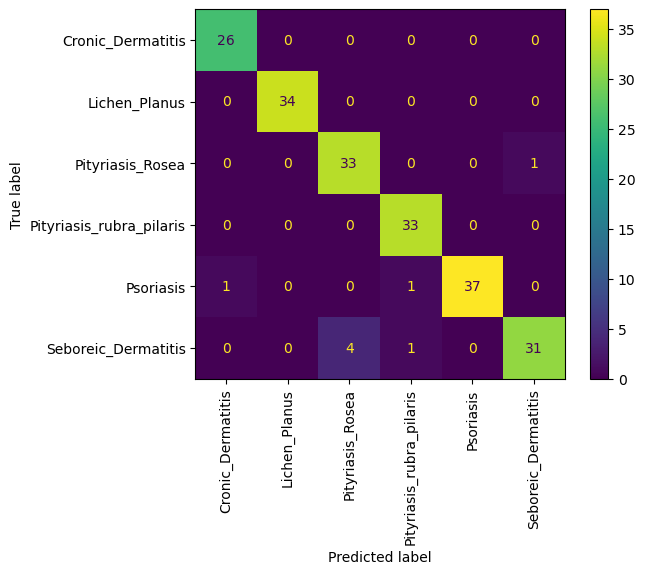

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_KNN_C, xticks_rotation='vertical')

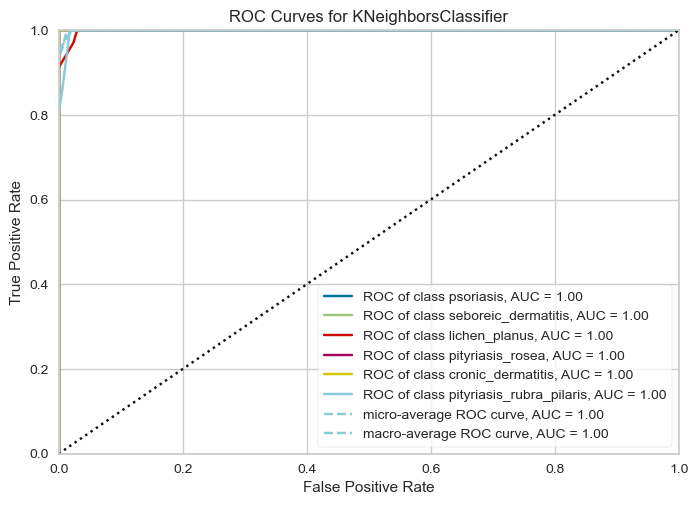

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [182]:
visualizer = ROCAUC(KNN_C, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

In [70]:
KNN_C.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [71]:
params_KNN_C = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
         'weights':["uniform", "distance"],
         'metric':['minkowski', 'chebyshev'],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size': [20,30,40],
         'p': [1,2]}

from sklearn.model_selection import ParameterGrid
param_size_KNN_C = ParameterGrid(params_KNN_C)
len(param_size_KNN_C)  

960

In [72]:
KNN_C_Tuned = KNeighborsClassifier(algorithm='auto', leaf_size= 20, metric= 'minkowski', n_neighbors= 4, p=2, weights= 'distance')
KNN_C_Tuned.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=4, weights='distance')

In [73]:
y_train_pred_KNN_C_Tuned= KNN_C_Tuned.predict(X_train) # training model 
y_test_pred_KNN_C_Tuned = KNN_C_Tuned.predict(X_test) # testing model 

In [74]:
#Evaluate Logistic Regression model:
print("KNN Tuned training set score: %f" % accuracy_score(y_train, y_train_pred_KNN_C_Tuned))
print("KNN Tuned test set score: %f" % accuracy_score(y_test, y_test_pred_KNN_C_Tuned))

KNN Tuned training set score: 1.000000
KNN Tuned test set score: 0.990099


In [75]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_KNN_C_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        26
     seboreic_dermatitis       1.00      1.00      1.00        34
           lichen_planus       0.97      0.97      0.97        34
        pityriasis_rosea       1.00      1.00      1.00        33
       cronic_dermatitis       1.00      1.00      1.00        39
pityriasis_rubra_pilaris       0.97      0.97      0.97        36

                accuracy                           0.99       202
               macro avg       0.99      0.99      0.99       202
            weighted avg       0.99      0.99      0.99       202



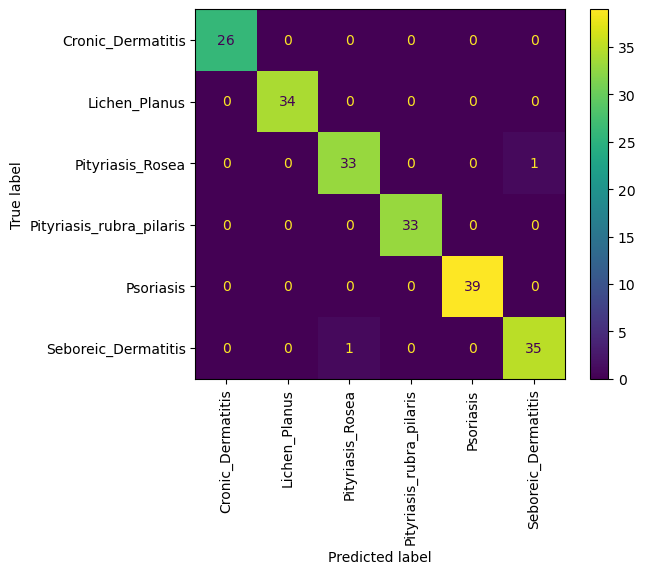

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_KNN_C_Tuned, xticks_rotation='vertical')

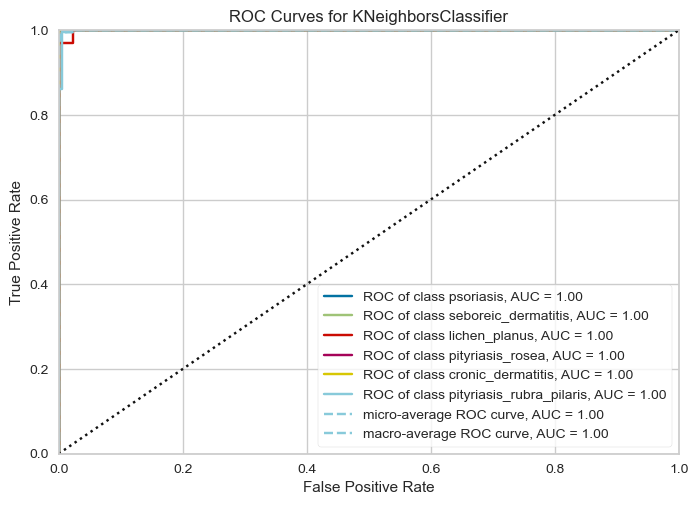

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [183]:
visualizer = ROCAUC(KNN_C_Tuned, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train_labeled)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test_labeled)        # Evaluate the model on the test data
visualizer.show() 

## 3. Support Vector Classifier

In [77]:
SVC = SVC(kernel='linear', gamma=1, C=1, decision_function_shape='ovr')
SVC.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

In [78]:
y_train_pred_SVC=SVC.predict(X_train)
y_test_pred_SVC=SVC.predict(X_test)

In [79]:
#Evaluate SVC model:
print("SVC training set score: %f" % accuracy_score(y_train, y_train_pred_SVC))
print("SVC test set score: %f" % accuracy_score(y_test, y_test_pred_SVC))

SVC training set score: 0.995745
SVC test set score: 0.965347


In [80]:
SVC.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [81]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_SVC, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        26
     seboreic_dermatitis       1.00      1.00      1.00        34
           lichen_planus       0.97      0.82      0.89        34
        pityriasis_rosea       1.00      1.00      1.00        33
       cronic_dermatitis       1.00      1.00      1.00        39
pityriasis_rubra_pilaris       0.85      0.97      0.91        36

                accuracy                           0.97       202
               macro avg       0.97      0.97      0.97       202
            weighted avg       0.97      0.97      0.97       202



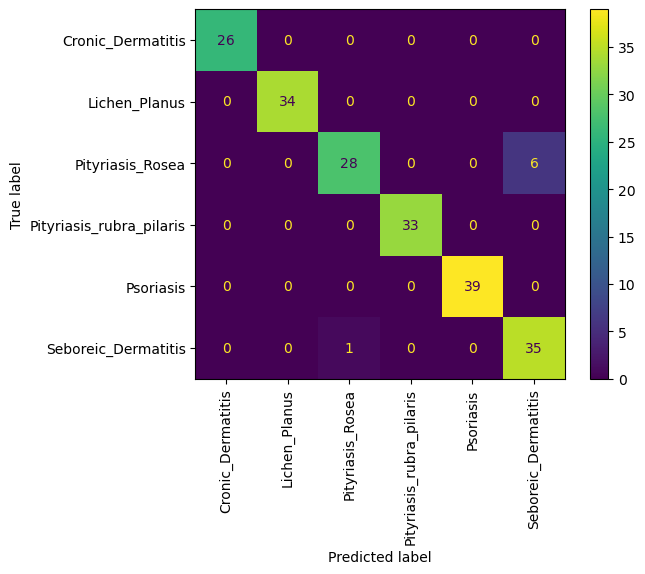

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_SVC, xticks_rotation='vertical')

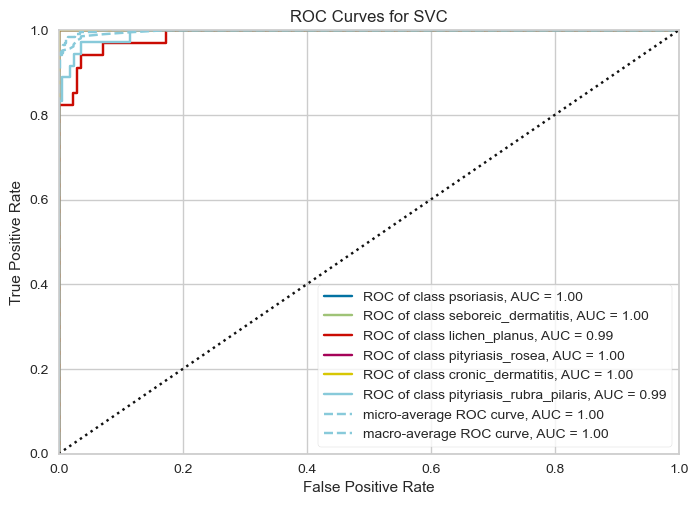

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [184]:
visualizer = ROCAUC(SVC, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train_labeled)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test_labeled)        # Evaluate the model on the test data
visualizer.show() 

## 4. Decision Tree Classifier

In [83]:
DT_C = DecisionTreeClassifier(random_state=42)

In [84]:
DT_C.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [85]:
y_train_pred_DT_C = DT_C.predict(X_train)
y_test_pred_DT_C = DT_C.predict(X_test)

In [86]:
#Evaluate DT model:

print("DT training set score: %f" % accuracy_score(y_train, y_train_pred_DT_C))
print("DT test set score: %f" % accuracy_score(y_test, y_test_pred_DT_C))

DT training set score: 1.000000
DT test set score: 0.965347


In [87]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_DT_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        26
     seboreic_dermatitis       0.97      0.97      0.97        34
           lichen_planus       0.91      0.91      0.91        34
        pityriasis_rosea       1.00      1.00      1.00        33
       cronic_dermatitis       0.97      1.00      0.99        39
pityriasis_rubra_pilaris       0.94      0.92      0.93        36

                accuracy                           0.97       202
               macro avg       0.97      0.97      0.97       202
            weighted avg       0.97      0.97      0.97       202



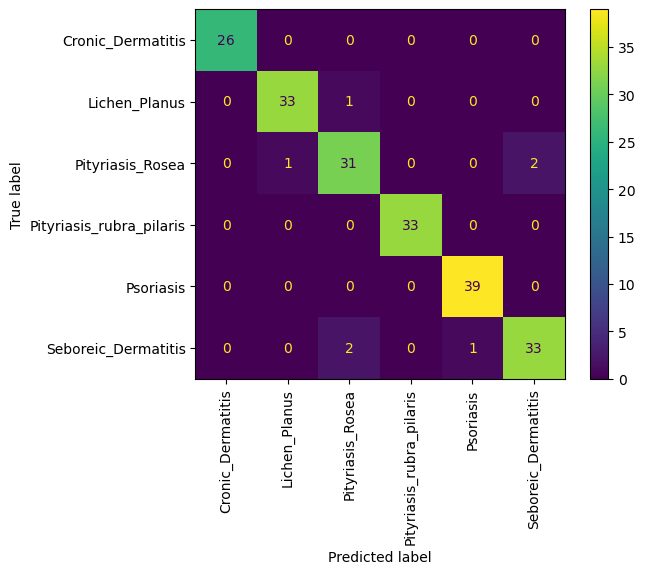

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_DT_C, xticks_rotation='vertical')

In [ ]:
visualizer = ROCAUC(DT_C, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train_labeled)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test_labeled)        # Evaluate the model on the test data
visualizer.show() 

In [89]:
DT_C.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [90]:
params_DT_C = {'max_depth':[1, 2 , 4, 6, 8, 10],
               'max_features': ['auto','sqrt', 'log2', None],
               'min_samples_leaf':[1,2, 4, 6, 8, 10, None],
               'min_samples_split':[1,2, 4, 6, 8, 10,None],
               'criterion':['gini','entropy', 'log_loss'],
               'splitter': ['best', 'random'],
               'max_leaf_nodes': [1, 3, 5, 10, 15, 20, 25, None],
               'random_state': [42]
              }
from sklearn.model_selection import ParameterGrid
param_size_DT_C = ParameterGrid(params_DT_C)
len(param_size_DT_C)  

56448

criterion='entropy', max_depth= 7, max_leaf_nodes= 15, min_samples_leaf= 1, min_samples_split= 6, splitter='random')

In [91]:
DT_C_Tuned = DecisionTreeClassifier(criterion='gini', max_depth= 8, max_leaf_nodes= None, min_samples_leaf= 1, min_samples_split= 4, max_features= None, random_state= 42, splitter='random')
DT_C_Tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=4, random_state=42,
                       splitter='random')

In [92]:
y_train_pred_DT_C_Tuned = DT_C_Tuned.predict(X_train) # training model 
y_test_pred_DT_C_Tuned = DT_C_Tuned.predict(X_test) # testing model 

In [93]:
#Evaluate Logistic Regression model:
print("Tuned DT Classifier  training set score: %f" % accuracy_score(y_train, y_train_pred_DT_C_Tuned))
print("Tuned DT Classifier testing set score: %f" % accuracy_score(y_test, y_test_pred_DT_C_Tuned))

Tuned DT Classifier  training set score: 0.995745
Tuned DT Classifier testing set score: 0.975248


In [94]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_DT_C_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        26
     seboreic_dermatitis       1.00      1.00      1.00        34
           lichen_planus       0.94      0.91      0.93        34
        pityriasis_rosea       1.00      1.00      1.00        33
       cronic_dermatitis       1.00      1.00      1.00        39
pityriasis_rubra_pilaris       0.92      0.94      0.93        36

                accuracy                           0.98       202
               macro avg       0.98      0.98      0.98       202
            weighted avg       0.98      0.98      0.98       202



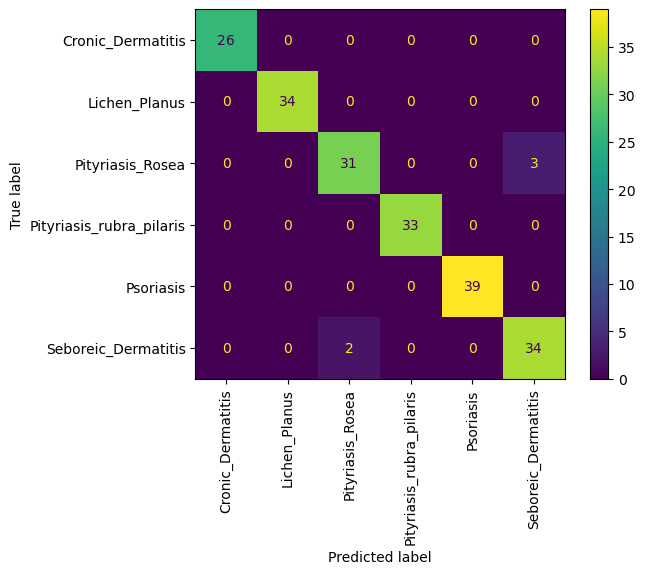

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_DT_C_Tuned, xticks_rotation='vertical')

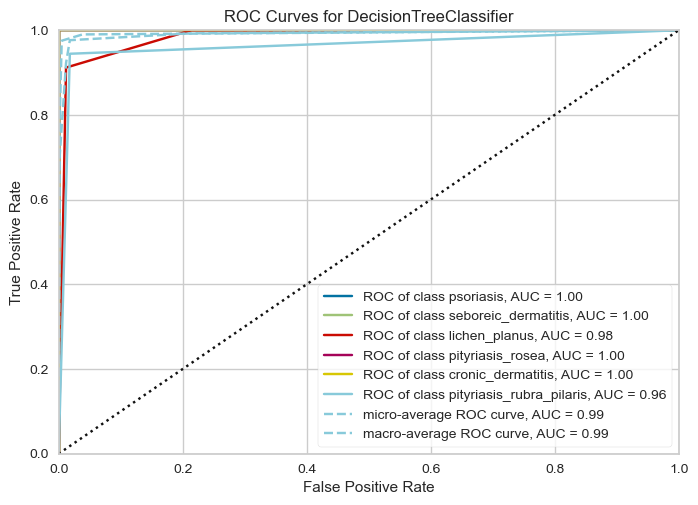

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [185]:
visualizer = ROCAUC(DT_C_Tuned, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train_labeled)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test_labeled)        # Evaluate the model on the test data
visualizer.show() 

## 5. Random Forest Classifier

In [96]:
RF_C = RandomForestClassifier(random_state=42)

In [97]:
RF_C.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
y_train_pred_RF_C=RF_C.predict(X_train)
y_test_pred_RF_C=RF_C.predict(X_test)

In [99]:
#Evaluate DT model:

print("RF Classifier training set score: %f" % accuracy_score(y_train,y_train_pred_RF_C))
print("RF Classifier test set score: %f" % accuracy_score(y_test, y_test_pred_RF_C))

RF Classifier training set score: 1.000000
RF Classifier test set score: 0.980198


In [100]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_RF_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        26
     seboreic_dermatitis       1.00      1.00      1.00        34
           lichen_planus       0.94      0.94      0.94        34
        pityriasis_rosea       1.00      1.00      1.00        33
       cronic_dermatitis       1.00      1.00      1.00        39
pityriasis_rubra_pilaris       0.94      0.94      0.94        36

                accuracy                           0.98       202
               macro avg       0.98      0.98      0.98       202
            weighted avg       0.98      0.98      0.98       202



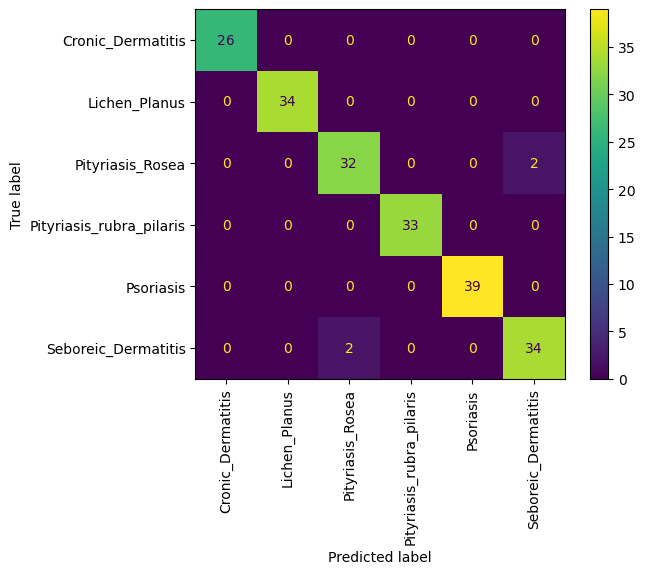

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_RF_C, xticks_rotation='vertical')

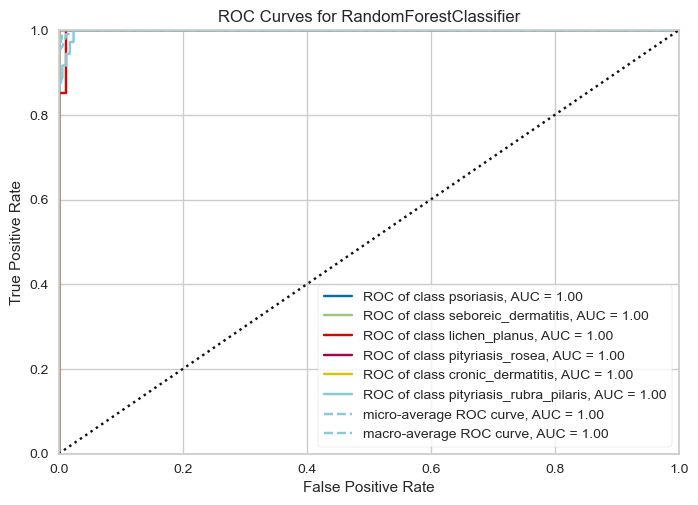

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [186]:
visualizer = ROCAUC(RF_C, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train_labeled)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test_labeled)        # Evaluate the model on the test data
visualizer.show() 

In [102]:
RF_C.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [103]:
params_RFC = {'n_estimators': [10,30,50,70, 80, 90, 100],
            'max_depth':[1, 2 , 4, 6, 8, 10, None],
            'min_samples_leaf':[1, 2 , 4, 6, 8, 10, None],
            'min_samples_split':[1, 2 , 4, 6, 8, 10, None],
            'criterion':['gini','entropy', 'log_loss'],
            'max_features':['sqrt','log2', None],
            'bootstrap':[True, False], 
            'random_state': [42]
}

from sklearn.model_selection import ParameterGrid
param_size_RFC = ParameterGrid(params_RFC)
len(param_size_RFC)  

43218

In [104]:
RFC_Tuned = RandomForestClassifier(bootstrap= True, criterion='gini', max_depth= 6, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state= 42)
RFC_Tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', random_state=42)

In [105]:
y_train_pred_RFC_Tuned = RFC_Tuned.predict(X_train) # training model 
y_test_pred_RFC_Tuned = RFC_Tuned.predict(X_test) # testing model 

In [106]:
#Evaluate Logistic Regression model:y_train_pred_RFC_Tuned
print("Tuned Random Forest Classifier training set score: %f" % accuracy_score(y_train, y_train_pred_RFC_Tuned))
print("Tuned Random Forest Classifier testing set score: %f" % accuracy_score(y_test, y_test_pred_RFC_Tuned))

Tuned Random Forest Classifier training set score: 0.993617
Tuned Random Forest Classifier testing set score: 0.970297


In [107]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_RFC_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        26
     seboreic_dermatitis       1.00      1.00      1.00        34
           lichen_planus       0.94      0.88      0.91        34
        pityriasis_rosea       1.00      1.00      1.00        33
       cronic_dermatitis       1.00      1.00      1.00        39
pityriasis_rubra_pilaris       0.89      0.94      0.92        36

                accuracy                           0.97       202
               macro avg       0.97      0.97      0.97       202
            weighted avg       0.97      0.97      0.97       202



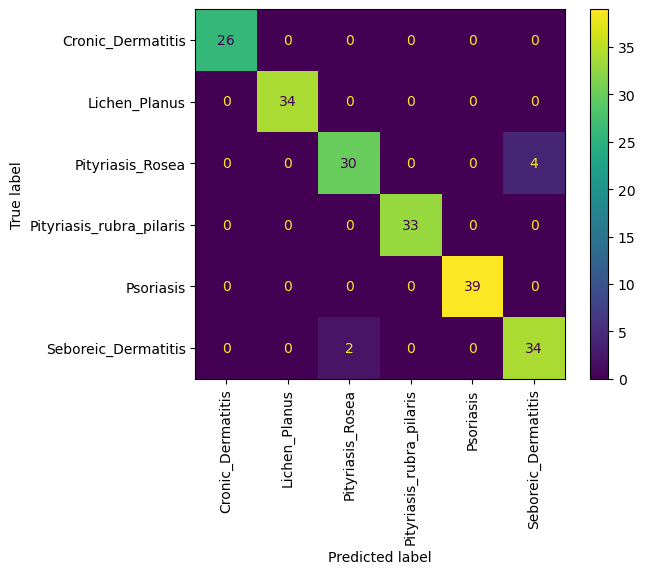

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_RFC_Tuned, xticks_rotation='vertical')

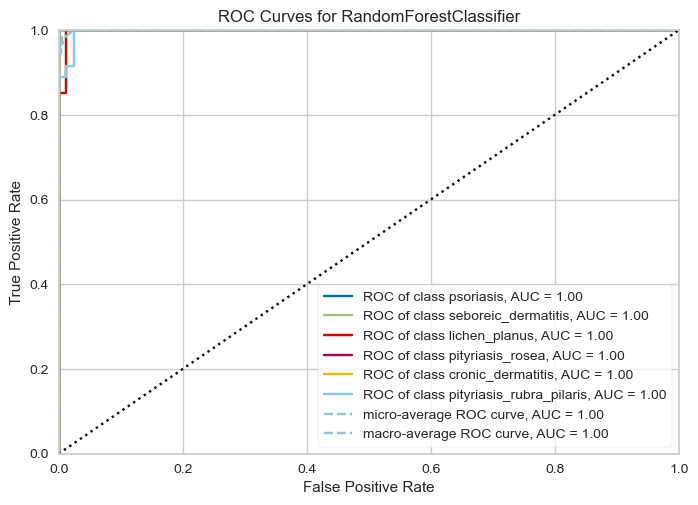

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [188]:
visualizer = ROCAUC(RFC_Tuned, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train_labeled)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test_labeled)        # Evaluate the model on the test data
visualizer.show() 

## 6. Multinomial Naive Bayes Classifier

In [109]:
MNB_C = MultinomialNB()
MNB_C.fit(X_train, y_train)

MultinomialNB()

In [110]:
y_train_pred_MNB_C = MNB_C.predict(X_train) # training model 
y_test_pred_MNB_C = MNB_C.predict(X_test)

In [111]:
#Evaluate Logistic Regression model:
print("Multinomial Naive Bayes training set score: %f" % accuracy_score(y_train, y_train_pred_MNB_C))
print("Multinomial Naive Bayes test set score: %f" % accuracy_score(y_test, y_test_pred_MNB_C))

Multinomial Naive Bayes training set score: 0.982979
Multinomial Naive Bayes test set score: 0.970297


In [112]:
MNB_C.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [113]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_MNB_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        26
     seboreic_dermatitis       1.00      1.00      1.00        34
           lichen_planus       0.91      0.94      0.93        34
        pityriasis_rosea       0.97      1.00      0.99        33
       cronic_dermatitis       1.00      1.00      1.00        39
pityriasis_rubra_pilaris       0.94      0.89      0.91        36

                accuracy                           0.97       202
               macro avg       0.97      0.97      0.97       202
            weighted avg       0.97      0.97      0.97       202



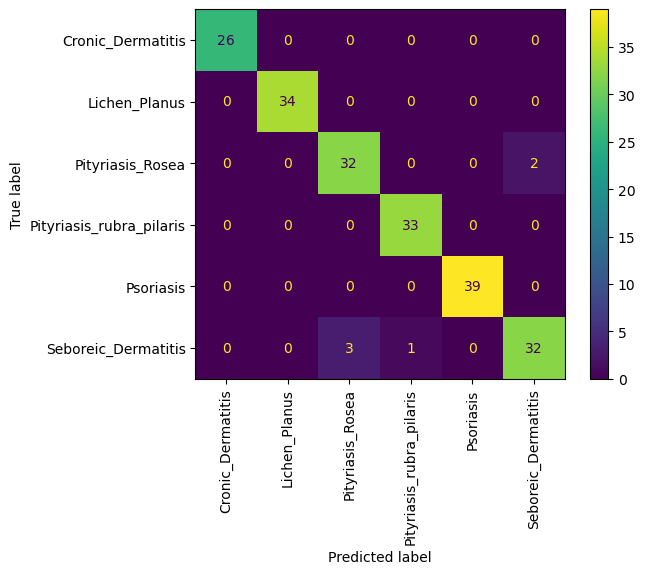

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_MNB_C, xticks_rotation='vertical')

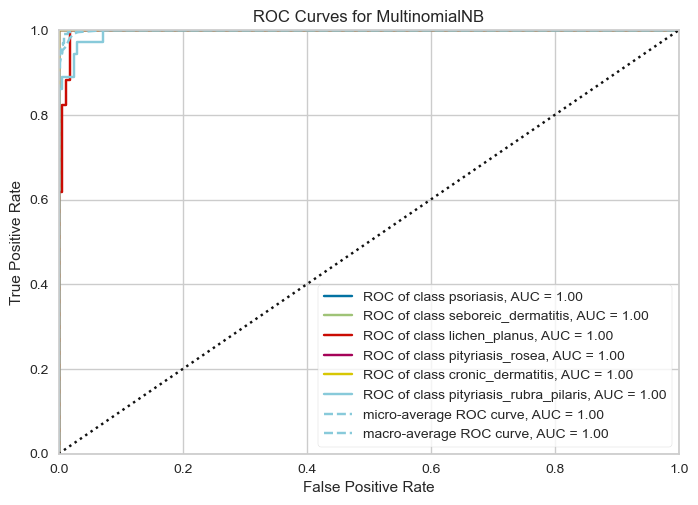

<AxesSubplot:title={'center':'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [189]:
visualizer = ROCAUC(MNB_C, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train_labeled)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test_labeled)        # Evaluate the model on the test data
visualizer.show() 

## 7. Gradient Boost Classifiers

In [115]:
GB_C = GradientBoostingClassifier(random_state=42)

In [116]:
GB_C.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [117]:
y_train_pred_GB_C = GB_C.predict(X_train)
y_test_pred_GB_C= GB_C.predict(X_test)

In [118]:
#Evaluate DT model:

print("GB_C training set score: %f" % accuracy_score(y_train,y_train_pred_GB_C))
print("GB_C test set score: %f" % accuracy_score(y_test, y_test_pred_GB_C))

GB_C training set score: 1.000000
GB_C test set score: 0.965347


In [119]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_GB_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        26
     seboreic_dermatitis       0.97      0.97      0.97        34
           lichen_planus       0.94      0.91      0.93        34
        pityriasis_rosea       1.00      0.97      0.98        33
       cronic_dermatitis       0.97      1.00      0.99        39
pityriasis_rubra_pilaris       0.92      0.94      0.93        36

                accuracy                           0.97       202
               macro avg       0.97      0.97      0.97       202
            weighted avg       0.97      0.97      0.97       202



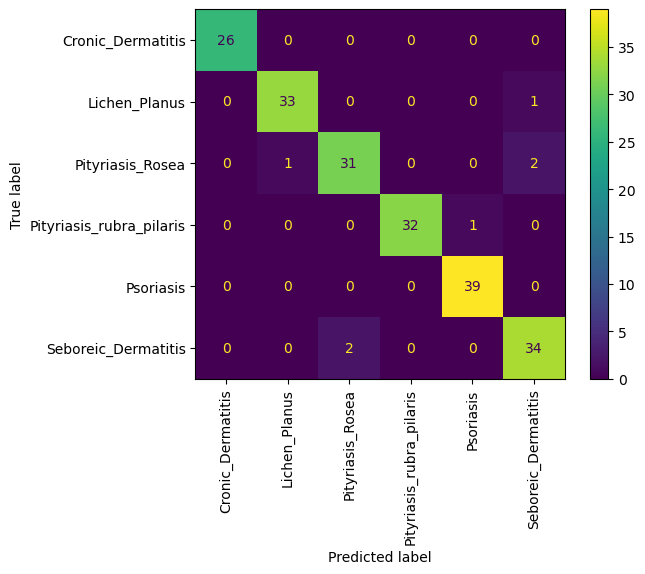

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_GB_C, xticks_rotation='vertical')

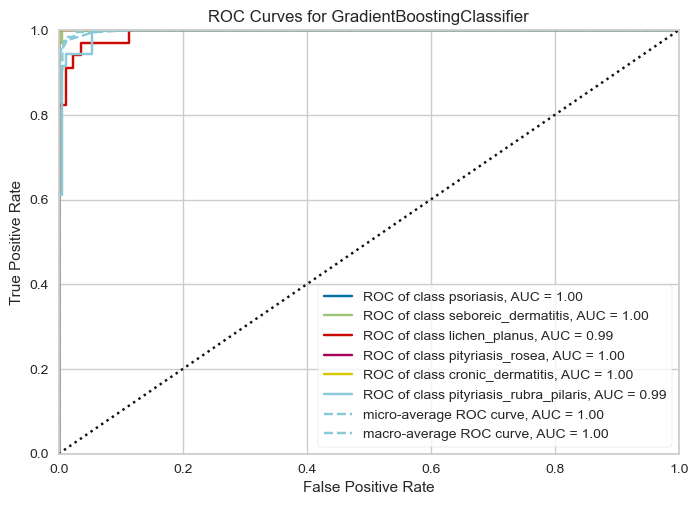

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [190]:
visualizer = ROCAUC(GB_C, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train_labeled)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test_labeled)        # Evaluate the model on the test data
visualizer.show() 

In [121]:
GB_C.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [122]:
params_GBC = {'loss':['log_loss', 'deviance', 'exponential'],
              'learning_rate':[0.01,0.05, 0.08, 0.1, 0.12, 0.15,0.20,0.25,0.30],
              'criterion':['fridman_mse', 'squared_error'],
              'max_features':['auto', 'sqrt','log2', None],
              'random_state': [35, 42]
}

from sklearn.model_selection import ParameterGrid
param_size_GBC = ParameterGrid(params_GBC)
len(param_size_GBC)  

432

In [123]:
GB_C_Tuned = GradientBoostingClassifier(criterion= 'squared_error', learning_rate= 0.01, loss='deviance', max_features='sqrt', random_state = 42)
GB_C_Tuned.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.01,
                           max_features='sqrt', random_state=42)

In [124]:
y_train_pred_GB_C_Tuned = GB_C_Tuned.predict(X_train) # training model 
y_test_pred_GB_C_Tuned = GB_C_Tuned.predict(X_test)

In [125]:
#Evaluate Logistic Regression model:
print("GB Tuned Classifier training set score: %f" % accuracy_score(y_train, y_train_pred_GB_C_Tuned))
print("GB Tuned Classifier test set score: %f" % accuracy_score(y_test, y_test_pred_GB_C_Tuned))

GB Tuned Classifier training set score: 0.995745
GB Tuned Classifier test set score: 0.980198


In [126]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_GB_C_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.96      1.00      0.98        26
     seboreic_dermatitis       1.00      1.00      1.00        34
           lichen_planus       0.97      0.94      0.96        34
        pityriasis_rosea       1.00      1.00      1.00        33
       cronic_dermatitis       1.00      1.00      1.00        39
pityriasis_rubra_pilaris       0.94      0.94      0.94        36

                accuracy                           0.98       202
               macro avg       0.98      0.98      0.98       202
            weighted avg       0.98      0.98      0.98       202



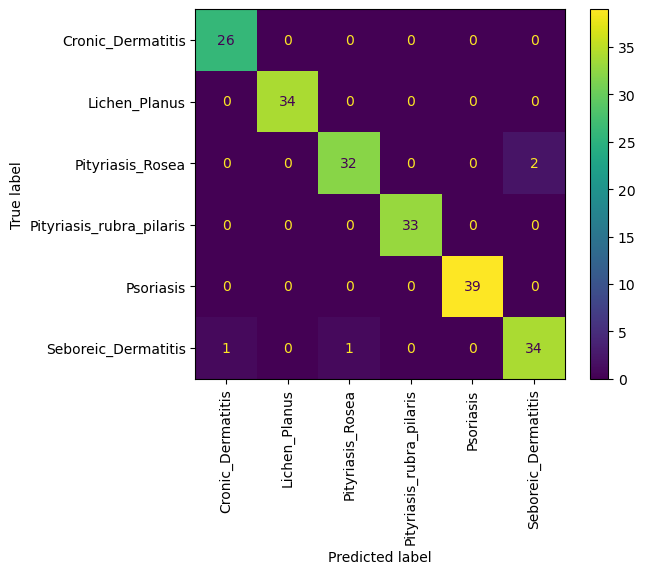

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_GB_C_Tuned, xticks_rotation='vertical')

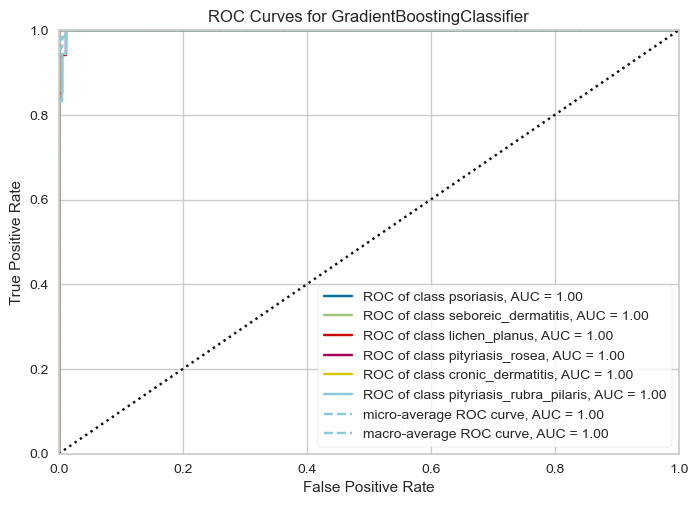

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [179]:
visualizer = ROCAUC(GB_C_Tuned, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train_labeled)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test_labeled)        # Evaluate the model on the test data
visualizer.show() 

## 8. XG Boost Classifier

In [128]:
XGB_C = XGBClassifier()

In [129]:
y

0      Seboreic_Dermatitis
1                Psoriasis
2            Lichen_Planus
3                Psoriasis
4            Lichen_Planus
              ...         
667    Seboreic_Dermatitis
668    Seboreic_Dermatitis
669    Seboreic_Dermatitis
670    Seboreic_Dermatitis
671    Seboreic_Dermatitis
Name: class, Length: 672, dtype: object

In [130]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_labeled = le.fit_transform(y)

In [131]:
y_labeled

array([5, 4, 1, 4, 1, 5, 0, 1, 2, 2, 4, 5, 5, 4, 1, 2, 5, 4, 1, 0, 3, 5,
       0, 1, 0, 4, 3, 0, 5, 1, 4, 5, 4, 4, 2, 5, 1, 5, 1, 4, 5, 2, 4, 5,
       0, 1, 2, 3, 5, 1, 1, 2, 4, 4, 0, 4, 5, 1, 2, 5, 3, 4, 0, 4, 5, 1,
       4, 2, 0, 4, 5, 3, 1, 0, 2, 5, 5, 4, 1, 0, 4, 5, 5, 5, 0, 4, 4, 1,
       4, 2, 5, 5, 0, 4, 1, 2, 5, 0, 4, 3, 5, 0, 4, 5, 5, 4, 2, 4, 1, 4,
       4, 1, 0, 1, 1, 0, 5, 1, 2, 4, 5, 0, 3, 4, 4, 5, 3, 1, 0, 2, 4, 4,
       1, 0, 0, 4, 2, 5, 1, 4, 5, 4, 4, 1, 1, 1, 5, 0, 2, 5, 5, 4, 4, 4,
       0, 1, 5, 1, 5, 5, 2, 5, 1, 3, 5, 4, 4, 1, 2, 1, 1, 4, 4, 4, 1, 4,
       4, 5, 1, 1, 4, 4, 4, 4, 3, 5, 5, 5, 5, 4, 1, 1, 1, 4, 4, 5, 1, 5,
       5, 5, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 3, 3, 3, 2, 2, 2, 4, 4, 4, 4, 4, 5, 5, 2, 2, 2, 4, 4, 5, 5,
       5, 1, 1, 1, 1, 4, 4, 4, 4, 0, 0, 0, 0, 0, 1,

In [132]:
list(le.inverse_transform([0,1,2,3,4,5]))

['Cronic_Dermatitis',
 'Lichen_Planus',
 'Pityriasis_Rosea',
 'Pityriasis_rubra_pilaris',
 'Psoriasis',
 'Seboreic_Dermatitis']

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_labeled, y_test_labeled = train_test_split(X, y_labeled, test_size=0.3, random_state=42)

In [134]:
XGB_C.fit(X_train, y_train_labeled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [135]:
y_train_pred_XGB_C =XGB_C.predict(X_train)
y_test_pred_XGB_C=XGB_C.predict(X_test)

In [136]:
#Evaluate DT model:
print("XGB_C training set score: %f" % accuracy_score(y_train_labeled,y_train_pred_XGB_C))
print("XGB_C test set score: %f" % accuracy_score(y_test_labeled, y_test_pred_XGB_C))

XGB_C training set score: 1.000000
XGB_C test set score: 0.965347


In [137]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test_labeled, y_test_pred_XGB_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        26
     seboreic_dermatitis       0.97      0.97      0.97        34
           lichen_planus       0.89      0.91      0.90        34
        pityriasis_rosea       1.00      1.00      1.00        33
       cronic_dermatitis       1.00      1.00      1.00        39
pityriasis_rubra_pilaris       0.94      0.92      0.93        36

                accuracy                           0.97       202
               macro avg       0.97      0.97      0.97       202
            weighted avg       0.97      0.97      0.97       202



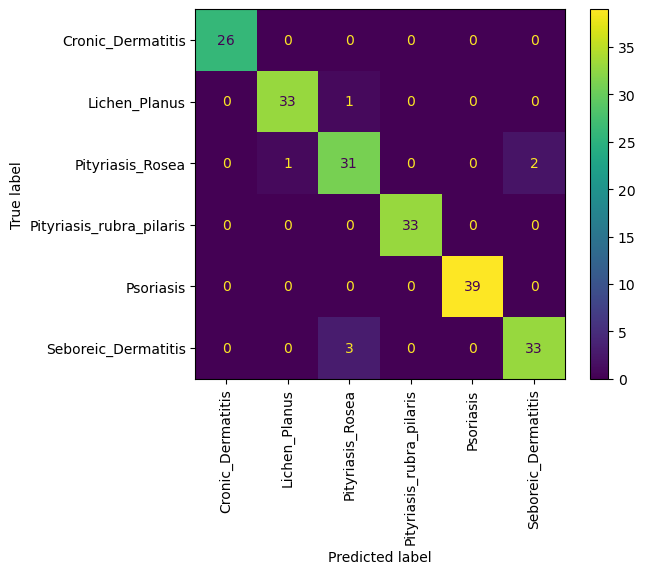

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_labeled, y_test_pred_XGB_C, xticks_rotation='vertical', display_labels=['Cronic_Dermatitis', 'Lichen_Planus', 'Pityriasis_Rosea', 'Pityriasis_rubra_pilaris', 'Psoriasis', 'Seboreic_Dermatitis'])

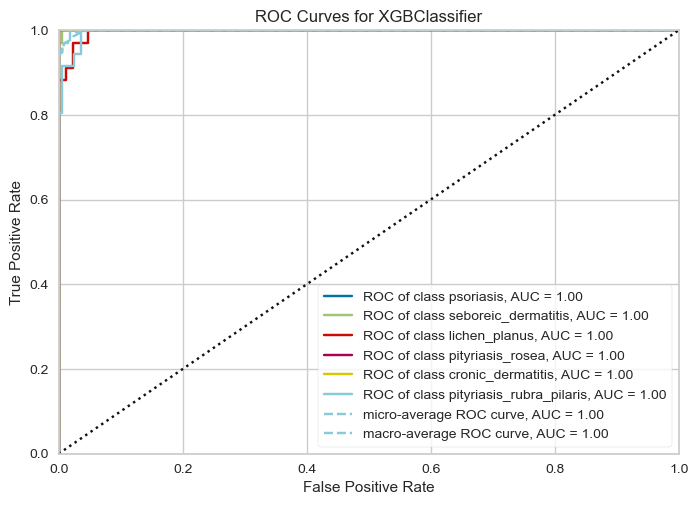

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [178]:
visualizer = ROCAUC(XGB_C, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train_labeled)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test_labeled)        # Evaluate the model on the test data
visualizer.show() 

In [139]:
XGB_C.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [140]:
params_XGB_C = {
    "max_depth": [3, 4, 5, 7, 9, 11, 13, 15, None],
    "learning_rate": [0.3, 0.1, 0.01, 0.03, 0.05, None],
    "gamma": [0, 0.25, 1, None],
    "reg_lambda": [0, 1, 10, None],
    "subsample": [0.4, 0.8, None],
    "colsample_bytree": [0.5, 0.7, 0.9, None],
}
from sklearn.model_selection import ParameterGrid
param_size_XGB_C = ParameterGrid(params_XGB_C)
len(param_size_XGB_C)  

10368

In [141]:
XGB_C_Tuned = XGBClassifier(colsample_bytree=0.5, gamma= 1, learning_rate= 0.01, max_depth= 4, reg_lambda= 0, subsample= 0.4)
XGB_C_Tuned.fit(X_train,  y_train_labeled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [142]:
y_train_pred_XGB_C_Tuned = XGB_C_Tuned.predict(X_train) # training model 
y_test_pred_XGB_C_Tuned = XGB_C_Tuned.predict(X_test)

In [143]:
#Evaluate Logistic Regression model:
print("XGB Tuned Classifier training set score: %f" % accuracy_score(y_train_labeled, y_train_pred_XGB_C_Tuned))
print("XGB Tuned Classifier test set score: %f" % accuracy_score(y_test_labeled, y_test_pred_XGB_C_Tuned))

XGB Tuned Classifier training set score: 0.995745
XGB Tuned Classifier test set score: 0.975248


- Precision expresses the proportion of data correctly predicted as positive. Using it as a metric, you can define the percent of the predicted class inside the data you classified as that class. 

**Precision** = (True Positive) / (True Positive + False Positive)

- The recall is defined as the number of true positives divided by the sum of true positives and false negatives. It expresses the ability to find all relevant instances in a dataset. Recall measures how good your model is at correctly predicting positive cases. It’s the proportion of actual positive cases which were correctly identified. The equation for recall is:

**Recall** = (True Positive) / (True Positive + False Negative

- Optimizing the precision/recall tradeoff comes down to finding an optimal threshold by looking at the precision and recall curves. The easiest way to be sure that you set your balance right is the F1 Score.

**F1-Score** = 2 [(Recall * Precision) / (Recall + Precision)]

The F1 score makes sure that you achieve a good balance between precision and recall. Whenever any of those two values is low, the F1 score will also be low. A high F1 score is a good indicator that your model performs well, since it achieves high values for both precision and recall. 

In [144]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test_labeled, y_test_pred_XGB_C_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        26
     seboreic_dermatitis       1.00      1.00      1.00        34
           lichen_planus       0.94      0.91      0.93        34
        pityriasis_rosea       1.00      1.00      1.00        33
       cronic_dermatitis       1.00      1.00      1.00        39
pityriasis_rubra_pilaris       0.92      0.94      0.93        36

                accuracy                           0.98       202
               macro avg       0.98      0.98      0.98       202
            weighted avg       0.98      0.98      0.98       202



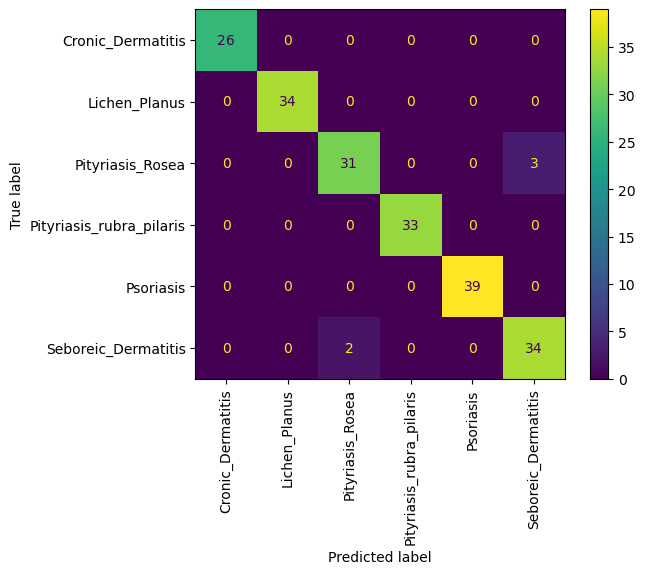

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_labeled, y_test_pred_XGB_C_Tuned, xticks_rotation='vertical',  display_labels=['Cronic_Dermatitis', 'Lichen_Planus', 'Pityriasis_Rosea', 'Pityriasis_rubra_pilaris', 'Psoriasis', 'Seboreic_Dermatitis'])

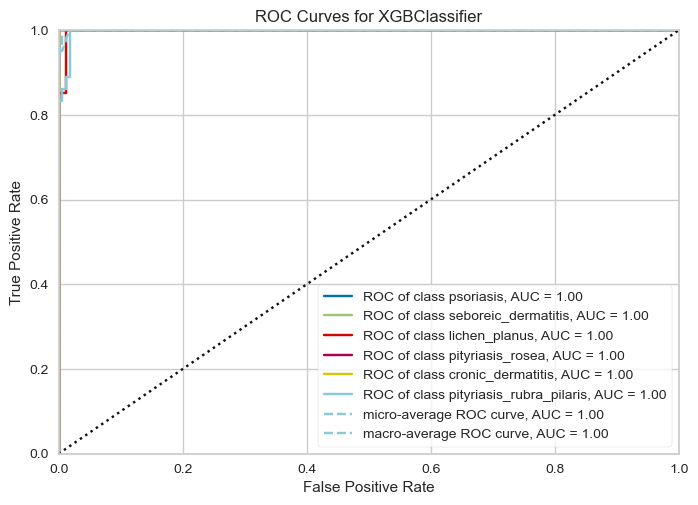

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [177]:
visualizer = ROCAUC(XGB_C_Tuned, classes=['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris'])


visualizer.fit(X_train, y_train_labeled)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test_labeled)        # Evaluate the model on the test data
visualizer.show() 

# MODEL COMPARISONS

In [146]:
Model_Comparison= pd.DataFrame({'Model':['Logistic Regressor (Tuned)', 
                                         'KNN Classifier (Tuned)', 
                                         'Support Vector Classifier ', 
                                         'Decision Tree Classifier(Tuned)', 
                                         'Random Forest Classifier(Tuned)', 
                                         'Multinomial Naive Bayes Classifier',
                                         'Gradient Boosting Classifier(Tuned)',
                                         'XG Boosting Classifier(Tuned)'],
                                'Train Score':[accuracy_score(y_train, y_train_pred_Log_Reg_Tuned), 
                                               accuracy_score(y_train, y_train_pred_KNN_C_Tuned), 
                                               accuracy_score(y_train, y_train_pred_SVC),
                                               accuracy_score(y_train, y_train_pred_DT_C_Tuned), 
                                               accuracy_score(y_train, y_train_pred_RFC_Tuned), 
                                               accuracy_score(y_train, y_train_pred_MNB_C),
                                               accuracy_score(y_train,y_train_pred_GB_C_Tuned),
                                               accuracy_score(y_train_labeled,y_train_pred_XGB_C_Tuned)],
                                'Test Score':[accuracy_score(y_test, y_test_pred_Log_Reg_Tuned), 
                                              accuracy_score(y_test, y_test_pred_KNN_C_Tuned), 
                                              accuracy_score(y_test, y_test_pred_SVC),
                                              accuracy_score(y_test, y_test_pred_DT_C_Tuned), 
                                              accuracy_score(y_test, y_test_pred_RFC_Tuned),
                                              accuracy_score(y_test, y_test_pred_MNB_C),
                                              accuracy_score(y_test, y_test_pred_GB_C_Tuned),
                                              accuracy_score(y_test_labeled, y_test_pred_XGB_C_Tuned)]})
Model_Comparison.index+=1
Model_Comparison

,Model,Train Score,Test Score
1,Logistic Regressor (Tuned),1.000000,0.985149
2,KNN Classifier (Tuned),1.000000,0.990099
3,Support Vector Classifier,0.995745,0.965347
4,Decision Tree Classifier(Tuned),0.995745,0.975248
5,Random Forest Classifier(Tuned),0.993617,0.970297
6,Multinomial Naive Bayes Classifier,0.982979,0.970297
7,Gradient Boosting Classifier(Tuned),0.995745,0.980198
8,XG Boosting Classifier(Tuned),0.995745,0.975248


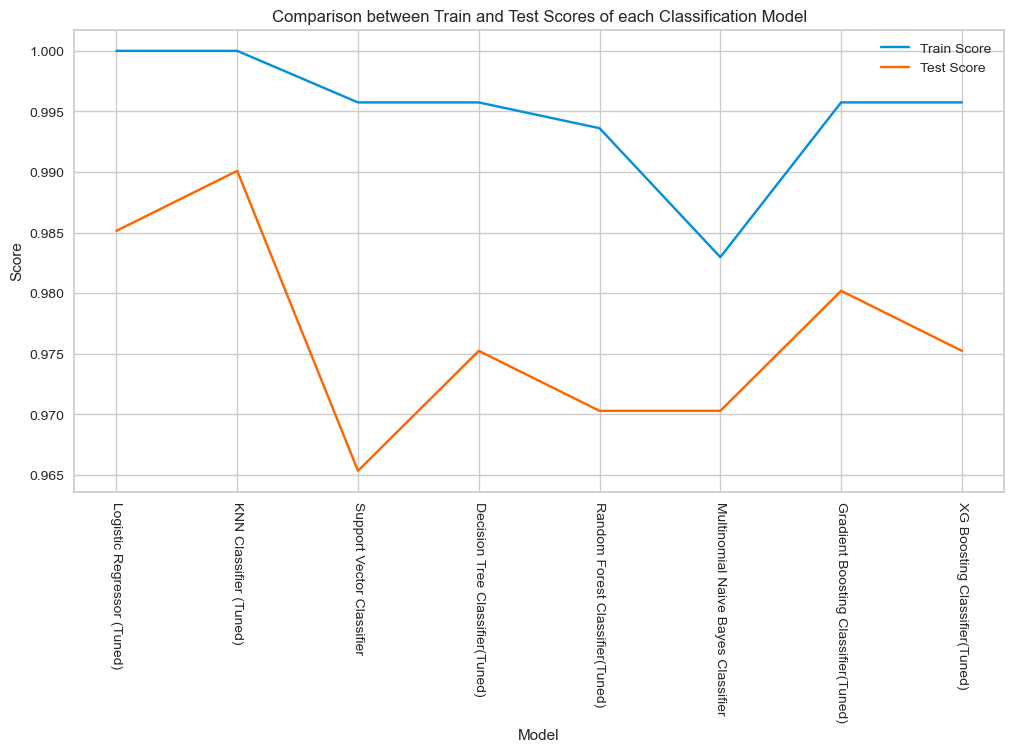

In [214]:
import matplotlib.pyplot as plt

# Get the data from the dataframe
model_names = Model_Comparison['Model'].tolist()
train_scores = Model_Comparison['Train Score'].tolist()
test_scores = Model_Comparison['Test Score'].tolist()
plt.figure(figsize=(12,6))
# Plot the data
plt.plot(model_names, train_scores, label='Train Score', color='#0590DA')
plt.plot(model_names, test_scores, label='Test Score', color='#FF6600')
plt.legend()
plt.xticks(rotation=270)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison between Train and Test Scores of each Classification Model')
plt.show()

In [212]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Train Score', x= Model_Comparison['Model'], y= Model_Comparison['Train Score'],  text= Model_Comparison['Train Score'], texttemplate='%{text:.3}', textposition='outside', marker_color='#0590DA'),
    go.Bar(name='Test Score', x= Model_Comparison['Model'], y=Model_Comparison['Test Score'], text= Model_Comparison['Test Score'], texttemplate='%{text:.3}', textposition='outside', marker_color='#FF6600')
])
# Change the bar mode
fig.update_layout(barmode='group', width=1000, height=600, margin=dict(l=50, r=50, b=50, t=60, pad=16))
fig.show()